# Build the DNA methylation data frame

Here we build the dataframe and also add in any patient information. 

We filter out poor quality samples and also create teh dataset for differential analysis.

In [2]:
import os
import pandas as pd
from collections import defaultdict

base_dir = '../data/S050_CCRCC_Clark_Cell2019/'
fig_dir = '../figures/data_qc/'
output_dir = f'{base_dir}sircle/'
supp_dir =  f'{base_dir}supps/'
data_dir = f'{base_dir}downloaded_data/Methylation_hg38_v1.0_20180809/'


In [18]:
#"Locus","Beta","chr","pos","strand","Name","Probe_rs","Probe_maf","CpG_rs","CpG_maf","SBE_rs","SBE_maf","Islands_Name","Relation_to_Island","UCSC_RefGene_Group","Phantom4_Enhancers","Phantom5_Enhancers","DMR","X450k_Enhancer","HMM_Island","Regulatory_Feature_Name","Regulatory_Feature_Group","GencodeBasicV12_NAME","GencodeBasicV12_Accession","GencodeBasicV12_Group","GencodeCompV12_NAME","GencodeCompV12_Accession","GencodeCompV12_Group","DNase_Hypersensitivity_NAME","DNase_Hypersensitivity_Evidence_Count","OpenChromatin_NAME","OpenChromatin_Evidence_Count","TFBS_NAME","TFBS_Evidence_Count","Methyl27_Loci","Methyl450_Loci","Random_Loci"
#"cg00000029",0.698308967012916,"chr16",53434200,"+","cg00000029",NA,NA,NA,NA,NA,NA,"chr16:53434372-53435297","N_Shore","TSS1500",NA,NA,"",NA,NA,"16:53433926-53435773","Promoter_Associated","RBL2","ENST00000262133.6","TSS1500","RBL2;RBL2;RBL2;RBL2","ENST00000262133.6;ENST00000567964.1;ENST00000544405.2;ENST00000567964.1","TSS1500;1stExon;TSS1500;5'UTR","chr16:53434093-53434558",3,NA,NA,NA,NA,NA,TRUE,NA
sample_df = pd.DataFrame()
case_ids = []
condition_labels = []
condition_ids = []
sample_id = []
first = True
cpg_df = pd.DataFrame()
files = os.listdir(f'{data_dir}')
# We want to make a sample DF and also merge the reils together 
for f in files:
    if 'Manifest' not in f and 'Processing' not in f:
        try:
            tmp_f = pd.read_csv(f'{data_dir}{f}')
            tumour_state = "Tumor" if f.split('.')[1] == "T" else "Normal"
            case_id = f.split('.')[0].replace("_", '-')
            cond_id = 1 if tumour_state == "Tumor" else 0
            new_name = f'{case_id}_{tumour_state}'
            case_ids.append(case_id)
            condition_labels.append(tumour_state)
            condition_ids.append(cond_id)
            sample_id.append(new_name)
            # Now we want to add to the df
            if first:
                for c in tmp_f.columns:
                    if c != 'Beta':
                        cpg_df[c] = tmp_f[c].values
                first = False
            cpg_df[new_name] = tmp_f['Beta'].values
        except:
            print(f)


C3N_00314.T.csv.gz
C3N_00315.T.csv.gz
C3N_01220.T.csv.gz
C3N_01361.T.csv.gz
C3L_01557.T.csv.gz
C3L_01281.T.csv.gz
C3L_00817.T.csv.gz
C3N_00852.T.csv.gz
C3L_01607.T.csv.gz
C3L_01352.T.csv.gz
C3L_00561.T.csv.gz
C3L_00103.T.csv.gz
C3N_00320.T.csv.gz
C3N_01214.T.csv.gz
C3N_01648.T.csv.gz
C3N_01649.T.csv.gz
C3N_00242.T.csv.gz
C3N_00832.T.csv.gz
C3N_00390.T.csv.gz
C3L_00800.T.csv.gz
C3L_00908.T.csv.gz
C3L_00902.T.csv.gz
C3L_01836.T.csv.gz
C3N_00150.T.csv.gz
C3L_00766.T.csv.gz
C3N_00577.T.csv.gz
C3N_00244.T.csv.gz
C3N_00834.T.csv.gz
C3N_00305.T.csv.gz
C3N_01808.T.csv.gz
C3N_00437.T.csv.gz
C3L_00011.T.csv.gz
C3L_00010.T.csv.gz
C3N_00168.T.csv.gz
C3N_00491.T.csv.gz
C3L_00088.T.csv.gz
C3L_00447.T.csv.gz
C3N_00313.T.csv.gz
C3N_00312.T.csv.gz
C3N_00646.T.csv.gz
C3N_00380.T.csv.gz
C3L_00088.N.csv.gz
C3L_00799.T.csv.gz
C3L_01287.T.csv.gz
C3L_01286.T.csv.gz
C3N_01176.T.csv.gz
C3L_00369.T.csv.gz
C3L_00792.T.csv.gz
C3L_00011.N.csv.gz
C3L_00010.N.csv.gz
C3N_00733.T.csv.gz
C3L_00583.T.csv.gz
C3L_00418.T.

In [3]:
import os
import pandas as pd
from collections import defaultdict

files = os.listdir(f'{data_dir}')

#"Locus","Beta","chr","pos","strand","Name","Probe_rs","Probe_maf","CpG_rs","CpG_maf","SBE_rs","SBE_maf","Islands_Name","Relation_to_Island","UCSC_RefGene_Group","Phantom4_Enhancers","Phantom5_Enhancers","DMR","X450k_Enhancer","HMM_Island","Regulatory_Feature_Name","Regulatory_Feature_Group","GencodeBasicV12_NAME","GencodeBasicV12_Accession","GencodeBasicV12_Group","GencodeCompV12_NAME","GencodeCompV12_Accession","GencodeCompV12_Group","DNase_Hypersensitivity_NAME","DNase_Hypersensitivity_Evidence_Count","OpenChromatin_NAME","OpenChromatin_Evidence_Count","TFBS_NAME","TFBS_Evidence_Count","Methyl27_Loci","Methyl450_Loci","Random_Loci"
#"cg00000029",0.698308967012916,"chr16",53434200,"+","cg00000029",NA,NA,NA,NA,NA,NA,"chr16:53434372-53435297","N_Shore","TSS1500",NA,NA,"",NA,NA,"16:53433926-53435773","Promoter_Associated","RBL2","ENST00000262133.6","TSS1500","RBL2;RBL2;RBL2;RBL2","ENST00000262133.6;ENST00000567964.1;ENST00000544405.2;ENST00000567964.1","TSS1500;1stExon;TSS1500;5'UTR","chr16:53434093-53434558",3,NA,NA,NA,NA,NA,TRUE,NA
n_c = 0
t_c = 0
# We want to make a sample DF and also merge the reils together 
for f in files:
    try:
        t = f.split('.')[1]
        if t == 'N':
            n_c += 1
        elif t == 'T':
            t_c += 1
    except:
        print(f)
print(n_c, t_c)

8 110


## Add in sample information

Here we get the cases from the methylation and find out the different attributes of the patients

In [4]:
cases = [c.split('.')[0].replace('_', '-') for c in files]
conds = ['Tumor' if c.split('.')[1] == 'T' else 'Normal' for c in files]
conds

['Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Normal',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Normal',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Normal',
 'Normal',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Normal',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tumor',
 'Tum

In [150]:
clin_df = pd.read_csv(f'{output_dir}clinical_sircle.csv')
clin_df

,case_id,gender,TumorStage,AgeGrouped,BMIGrouped,RaceGrouped,MTOR_mutation,VHL_mutation,SETD2_mutation,PBRM1_mutation,...,CIMPStatus,GenomeInstability,VHL+TTN,VHL-TTN,VHL+PBRM1,VHL-PBRM1,PBRM1-VHL,VHL,TTN-VHL,TTN+PBRM1-VHL
0,C3L-00004,Male,Stage III,old,normal,White,0,1,1,1,...,1,0,0,1,1,0,0,0,0,0
1,C3L-00010,Male,Stage I,young,between,White,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
2,C3L-00011,Female,Stage IV,old,between,White,0,1,0,0,...,1,1,1,0,0,1,0,0,0,0
3,C3L-00026,Female,Stage I,old,between,White,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
4,C3L-00079,Male,Stage III,middle,obese,White,0,1,0,0,...,1,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,C3N-01646,Male,Stage III,old,between,White,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
106,C3N-01648,Male,Stage II,old,between,White,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107,C3N-01649,Male,Stage III,middle,obese,White,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
108,C3N-01651,Male,Stage II,old,between,White,0,1,1,1,...,1,1,1,0,1,0,0,0,0,0


In [6]:
sample_df = pd.DataFrame()
sample_df['SampleId'] = [f'{c}_{conds[i]}' for i, c in enumerate(cases)]
sample_df['CondId'] = [1 if c == 'Tumor' else 0 for c in conds]
sample_df['CondName'] = conds
sample_df['CaseId'] = cases
sample_df['SafeCases'] = [c.replace('-', '.') for c in cases]
sample_df['FullLabel'] = sample_df['SampleId'].values
## -------- DNA methylation

new_full_label_map = {}
new_full_label = []
for full_label in sample_df['FullLabel'].values:
    new_label = f'CpG_{full_label.split("_")[1]}_{full_label.split("_")[0].replace("-", ".")}_1'
    new_full_label.append(new_label)
    new_full_label_map[full_label] = new_label
    
sample_df['FullLabel'] = new_full_label
clin_df = pd.read_csv(f'{output_dir}clinical_sircle.csv')
# We want to make a RNAseq clinical dataframe using the case IDs in the labels
sample_df = sample_df.set_index("CaseId").join(clin_df.set_index("case_id"), how="left", rsuffix='_')

sample_df.to_csv(f'{output_dir}CCRCC_Clark_Cell2019_meth_sample_df.csv')
sample_df



,SampleId,CondId,CondName,SafeCases,FullLabel,gender,TumorStage,AgeGrouped,BMIGrouped,RaceGrouped,...,CIMPStatus,GenomeInstability,VHL+TTN,VHL-TTN,VHL+PBRM1,VHL-PBRM1,PBRM1-VHL,VHL,TTN-VHL,TTN+PBRM1-VHL
C3L-00004,C3L-00004_Tumor,1,Tumor,C3L.00004,CpG_Tumor_C3L.00004_1,Male,Stage III,old,normal,White,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
C3L-00004,C3L-00004_Normal,0,Normal,C3L.00004,CpG_Normal_C3L.00004_1,Male,Stage III,old,normal,White,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
C3L-00010,C3L-00010_Tumor,1,Tumor,C3L.00010,CpG_Tumor_C3L.00010_1,Male,Stage I,young,between,White,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
C3L-00010,C3L-00010_Normal,0,Normal,C3L.00010,CpG_Normal_C3L.00010_1,Male,Stage I,young,between,White,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
C3L-00011,C3L-00011_Tumor,1,Tumor,C3L.00011,CpG_Tumor_C3L.00011_1,Female,Stage IV,old,between,White,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C3N-01649,C3N-01649_Tumor,1,Tumor,C3N.01649,CpG_Tumor_C3N.01649_1,Male,Stage III,middle,obese,White,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
C3N-01651,C3N-01651_Tumor,1,Tumor,C3N.01651,CpG_Tumor_C3N.01651_1,Male,Stage II,old,between,White,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
C3N-01808,C3N-01808_Tumor,1,Tumor,C3N.01808,CpG_Tumor_C3N.01808_1,Male,Stage I,middle,between,White,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Manifest,Manifest_Normal,0,Normal,Manifest,CpG_Normal_Manifest_1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
sample_df['CondName'].value_counts()

Tumor     110
Normal     10
Name: CondName, dtype: int64

## Remove non CpG islands

- We keep the CpG islands only since we're looking at cancer and these have previously been implicated


In [8]:
# Have a look at how many are in each region (CpG island, shore etc)
print(cpg_df['Relation_to_Island'].value_counts())

cpg_df = cpg_df.drop_duplicates(subset='Locus') # Remove duplicates from the locus
cpg_df.to_csv(f'{output_dir}CCRCC_Clark_Cell2019_meth_df_24012022.csv', index=False)

OpenSea    478827
Island     195866
N_Shore     94323
S_Shore     86237
N_Shelf     32905
S_Shelf     29502
Name: Relation_to_Island, dtype: int64


In [9]:
print('\n'.join([c for c in cpg_df.columns]))

Locus
chr
pos
strand
Name
Probe_rs
Probe_maf
CpG_rs
CpG_maf
SBE_rs
SBE_maf
Islands_Name
Relation_to_Island
UCSC_RefGene_Group
Phantom4_Enhancers
Phantom5_Enhancers
DMR
X450k_Enhancer
HMM_Island
Regulatory_Feature_Name
Regulatory_Feature_Group
GencodeBasicV12_NAME
GencodeBasicV12_Accession
GencodeBasicV12_Group
GencodeCompV12_NAME
GencodeCompV12_Accession
GencodeCompV12_Group
DNase_Hypersensitivity_NAME
DNase_Hypersensitivity_Evidence_Count
OpenChromatin_NAME
OpenChromatin_Evidence_Count
TFBS_NAME
TFBS_Evidence_Count
Methyl27_Loci
Methyl450_Loci
Random_Loci
C3N-00314_Tumor
C3N-00315_Tumor
C3N-01220_Tumor
C3N-01361_Tumor
C3L-01557_Tumor
C3L-01281_Tumor
C3L-00817_Tumor
C3N-00852_Tumor
C3L-01607_Tumor
C3L-01352_Tumor
C3L-00561_Tumor
C3L-00103_Tumor
C3N-00320_Tumor
C3N-01214_Tumor
C3N-01648_Tumor
C3N-01649_Tumor
C3N-00242_Tumor
C3N-00832_Tumor
C3N-00390_Tumor
C3L-00800_Tumor
C3L-00908_Tumor
C3L-00902_Tumor
C3L-01836_Tumor
C3N-00150_Tumor
C3L-00766_Tumor
C3N-00577_Tumor
C3N-00244_Tumor
C3N-0

In [3]:
cpg_df = pd.read_csv(f'{output_dir}CCRCC_Clark_Cell2019_meth_df_24012022.csv')
cpg_df

/Users/ariane/opt/miniconda3/envs/BINF/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7,9,14,16,18,33,34,35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Locus,chr,pos,strand,Name,Probe_rs,Probe_maf,CpG_rs,CpG_maf,SBE_rs,...,C3L-00004_Normal,C3L-01302_Tumor,C3N-00154_Tumor,C3L-00907_Tumor,C3N-00492_Tumor,C3L-00183_Tumor,C3N-00246_Tumor,C3N-00435_Tumor,C3N-01651_Tumor,C3L-00079_Normal
0,cg00000029,chr16,53434200,+,cg00000029,NaN,NaN,NaN,NaN,NaN,...,0.386350,0.718977,0.706300,0.452360,0.089657,0.651587,0.697866,0.587587,0.503078,0.517382
1,cg00000109,chr3,172198247,+,cg00000109,NaN,NaN,NaN,NaN,NaN,...,0.900615,0.746385,0.878217,0.588851,0.906080,0.707547,0.413001,0.867700,0.857730,0.889308
2,cg00000155,chr7,2550931,+,cg00000155,NaN,NaN,NaN,NaN,NaN,...,0.919684,0.942895,0.944550,0.886260,0.923272,0.919509,0.922028,0.929238,0.921905,0.922265
3,cg00000158,chr9,92248273,+,cg00000158,NaN,NaN,NaN,NaN,NaN,...,0.940475,0.725188,0.806784,0.666172,0.941073,0.810225,0.342981,0.783376,0.615841,0.941191
4,cg00000165,chr1,90729117,-,cg00000165,NaN,NaN,NaN,NaN,NaN,...,0.172201,0.419374,0.302997,0.140417,0.077921,0.063611,0.073037,0.183337,0.101652,0.125194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835897,ch.X.97129969R,chrX,97988315,+,ch.X.97129969R,NaN,NaN,NaN,NaN,NaN,...,0.071994,0.046536,0.106285,0.230495,0.030725,0.042781,0.126884,0.005127,0.138371,0.077667
835898,ch.X.97133160R,chrX,97991506,+,ch.X.97133160R,NaN,NaN,NaN,NaN,NaN,...,0.116067,0.025906,0.110200,0.176392,0.100184,0.015064,0.086274,0.000000,0.136119,0.139897
835899,ch.X.97651759F,chrX,98510105,+,ch.X.97651759F,NaN,NaN,NaN,NaN,NaN,...,0.030164,0.034085,0.046997,0.064078,0.022370,0.020821,0.032864,0.033618,0.035891,0.025905
835900,ch.X.97737721F,chrX,98596067,+,ch.X.97737721F,NaN,NaN,NaN,NaN,NaN,...,0.077678,0.060254,0.065040,0.059029,0.053483,0.096010,0.074208,0.066237,0.083277,0.070779


## Get paired samples and check correlations/PCA between patients



/Users/ariane/opt/miniconda3/envs/BINF/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


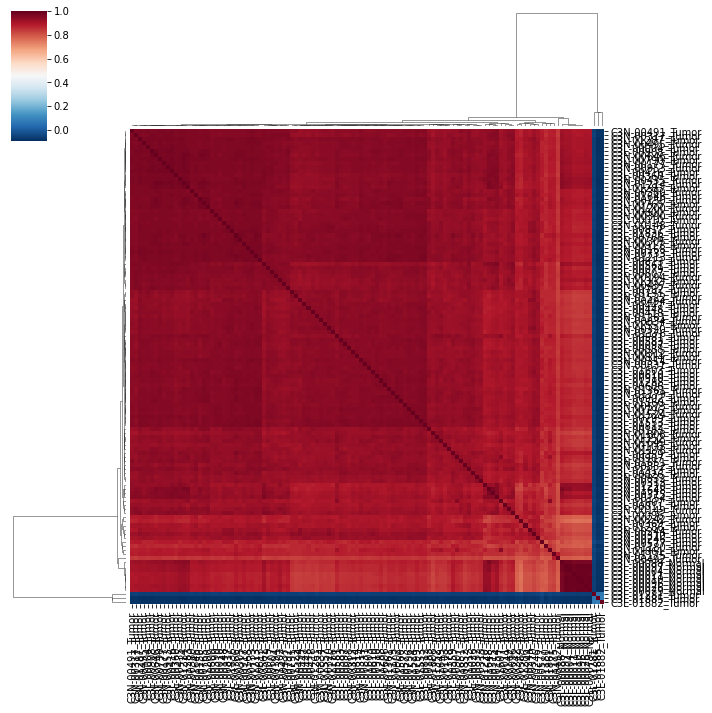

(array([ 3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1., 15., 99.]),
 array([-0.06894518, -0.01946082,  0.03002354,  0.0795079 ,  0.12899226,
         0.17847663,  0.22796099,  0.27744535,  0.32692971,  0.37641407,
         0.42589843,  0.47538279,  0.52486715,  0.57435151,  0.62383587,
         0.67332023,  0.72280459,  0.77228895,  0.82177331,  0.87125767,
         0.92074203]),
 <BarContainer object of 20 artists>)

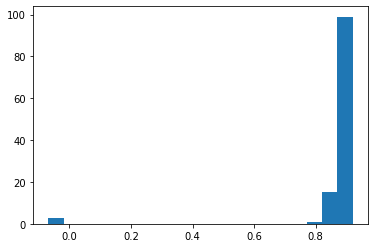

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

all_cases = [c for c in cpg_df.columns if 'C3' in c]
corr = cpg_df[all_cases].corr()
sns.clustermap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap='RdBu_r', row_cluster=True, col_cluster=True)
plt.savefig(f'{fig_dir}Heatmap_CpGs.svg')
plt.show()

# Print out the minimum correlation:
min(np.min(corr))
mean_cor = np.mean(corr, axis=1)
corr['mean_corr'] = mean_cor
corr.sort_values(by=['mean_corr'])
# Plot out the mean correlation values so we can choose a good filter.
plt.hist(mean_cor, bins=20)


In [5]:
from sciutil import SciUtil
u = SciUtil()

# Actually remove those columns! (But make sure you keep the ID column)
corr_sorted = corr.sort_values(by=['mean_corr'])
corr_sorted = corr_sorted[corr_sorted['mean_corr'] < 0.75]
u.dp([len(corr_sorted), 'patients with avg. correlations less than 75. Filtering out these samples, and printing cases.'])

cols_to_omit = [c for c in corr_sorted.index if 'C3' in c]
case_ids = [c.split('_')[0] for c in corr_sorted.index if 'C3' in c]
print('\n'.join(case_ids))
print('\n'.join(cols_to_omit))
cols_to_keep = [c for c in cpg_df.columns if c not in cols_to_omit]
cpg_filtered = cpg_df[cols_to_keep]

# Fill NAs with 0's
cpg_filtered = cpg_filtered.fillna(0)
value_cols = [c for c in cols_to_keep if 'C3' in c]
#Check what the heatmap looks like again
corr = cpg_filtered[value_cols].corr()
sns.clustermap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap='RdBu_r', row_cluster=True, col_cluster=True)
plt.savefig(f'{fig_dir}Heatmap_CpG_removed_corr-leq-0.75.svg')

--------------------------------------------------------------------------------
3	patients with avg. correlations less than 75. Filtering out these samples, and printing cases.	
--------------------------------------------------------------------------------
C3L-01885
C3L-01882
C3L-01281
C3L-01885_Tumor
C3L-01882_Tumor
C3L-01281_Tumor


In [9]:
cpg_filtered

,Locus,chr,pos,strand,Name,Probe_rs,Probe_maf,CpG_rs,CpG_maf,SBE_rs,...,C3L-00004_Normal,C3L-01302_Tumor,C3N-00154_Tumor,C3L-00907_Tumor,C3N-00492_Tumor,C3L-00183_Tumor,C3N-00246_Tumor,C3N-00435_Tumor,C3N-01651_Tumor,C3L-00079_Normal
0,cg00000029,chr16,53434200,+,cg00000029,0,0.0,0,0.0,0,...,0.386350,0.718977,0.706300,0.452360,0.089657,0.651587,0.697866,0.587587,0.503078,0.517382
1,cg00000109,chr3,172198247,+,cg00000109,0,0.0,0,0.0,0,...,0.900615,0.746385,0.878217,0.588851,0.906080,0.707547,0.413001,0.867700,0.857730,0.889308
2,cg00000155,chr7,2550931,+,cg00000155,0,0.0,0,0.0,0,...,0.919684,0.942895,0.944550,0.886260,0.923272,0.919509,0.922028,0.929238,0.921905,0.922265
3,cg00000158,chr9,92248273,+,cg00000158,0,0.0,0,0.0,0,...,0.940475,0.725188,0.806784,0.666172,0.941073,0.810225,0.342981,0.783376,0.615841,0.941191
4,cg00000165,chr1,90729117,-,cg00000165,0,0.0,0,0.0,0,...,0.172201,0.419374,0.302997,0.140417,0.077921,0.063611,0.073037,0.183337,0.101652,0.125194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835897,ch.X.97129969R,chrX,97988315,+,ch.X.97129969R,0,0.0,0,0.0,0,...,0.071994,0.046536,0.106285,0.230495,0.030725,0.042781,0.126884,0.005127,0.138371,0.077667
835898,ch.X.97133160R,chrX,97991506,+,ch.X.97133160R,0,0.0,0,0.0,0,...,0.116067,0.025906,0.110200,0.176392,0.100184,0.015064,0.086274,0.000000,0.136119,0.139897
835899,ch.X.97651759F,chrX,98510105,+,ch.X.97651759F,0,0.0,0,0.0,0,...,0.030164,0.034085,0.046997,0.064078,0.022370,0.020821,0.032864,0.033618,0.035891,0.025905
835900,ch.X.97737721F,chrX,98596067,+,ch.X.97737721F,0,0.0,0,0.0,0,...,0.077678,0.060254,0.065040,0.059029,0.053483,0.096010,0.074208,0.066237,0.083277,0.070779


In [10]:
case_ids

['C3L-01885', 'C3L-01882', 'C3L-01281']

In [12]:
len([c for c in cpg_filtered.columns if 'C3' in c and 'Tumor' in c])

107

## Add entrez gene ID and ensembl gene ID for the gene names

In [121]:
cpg_df = pd.read_csv(f'{output_dir}CCRCC_Clark_Cell2019_meth_df_24012022.csv')
cpg_df

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_41378/2497383961.py:1: DtypeWarning: Columns (7,9,14,16,18,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  cpg_df = pd.read_csv(f'{output_dir}CCRCC_Clark_Cell2019_meth_df_24012022.csv')


,Locus,chr,pos,strand,Name,Probe_rs,Probe_maf,CpG_rs,CpG_maf,SBE_rs,...,C3L-00004_Normal,C3L-01302_Tumor,C3N-00154_Tumor,C3L-00907_Tumor,C3N-00492_Tumor,C3L-00183_Tumor,C3N-00246_Tumor,C3N-00435_Tumor,C3N-01651_Tumor,C3L-00079_Normal
0,cg00000029,chr16,53434200,+,cg00000029,NaN,NaN,NaN,NaN,NaN,...,0.386350,0.718977,0.706300,0.452360,0.089657,0.651587,0.697866,0.587587,0.503078,0.517382
1,cg00000109,chr3,172198247,+,cg00000109,NaN,NaN,NaN,NaN,NaN,...,0.900615,0.746385,0.878217,0.588851,0.906080,0.707547,0.413001,0.867700,0.857730,0.889308
2,cg00000155,chr7,2550931,+,cg00000155,NaN,NaN,NaN,NaN,NaN,...,0.919684,0.942895,0.944550,0.886260,0.923272,0.919509,0.922028,0.929238,0.921905,0.922265
3,cg00000158,chr9,92248273,+,cg00000158,NaN,NaN,NaN,NaN,NaN,...,0.940475,0.725188,0.806784,0.666172,0.941073,0.810225,0.342981,0.783376,0.615841,0.941191
4,cg00000165,chr1,90729117,-,cg00000165,NaN,NaN,NaN,NaN,NaN,...,0.172201,0.419374,0.302997,0.140417,0.077921,0.063611,0.073037,0.183337,0.101652,0.125194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835897,ch.X.97129969R,chrX,97988315,+,ch.X.97129969R,NaN,NaN,NaN,NaN,NaN,...,0.071994,0.046536,0.106285,0.230495,0.030725,0.042781,0.126884,0.005127,0.138371,0.077667
835898,ch.X.97133160R,chrX,97991506,+,ch.X.97133160R,NaN,NaN,NaN,NaN,NaN,...,0.116067,0.025906,0.110200,0.176392,0.100184,0.015064,0.086274,0.000000,0.136119,0.139897
835899,ch.X.97651759F,chrX,98510105,+,ch.X.97651759F,NaN,NaN,NaN,NaN,NaN,...,0.030164,0.034085,0.046997,0.064078,0.022370,0.020821,0.032864,0.033618,0.035891,0.025905
835900,ch.X.97737721F,chrX,98596067,+,ch.X.97737721F,NaN,NaN,NaN,NaN,NaN,...,0.077678,0.060254,0.065040,0.059029,0.053483,0.096010,0.074208,0.066237,0.083277,0.070779


In [123]:
annotation_file = f'{supp_dir}hsapiens_gene_ensembl-GRCh38.p13.csv'
annot = pd.read_csv(annotation_file)
# Merge the Hg37 with Hg38
hg37_annot = pd.read_csv(f'{supp_dir}hsapiens_gene_ensembl-GRCh37.p13.csv')
hg37_annot
hg37_annot = hg37_annot.merge(annot, on="ensembl_gene_id", how="inner", suffixes=('_hg37', '_hg38'))
hg37_annot


/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_41378/2583110450.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  hg37_annot = pd.read_csv(f'{supp_dir}hsapiens_gene_ensembl-GRCh37.p13.csv')


,ensembl_gene_id,external_gene_name_hg37,chromosome_name_hg37,start_position_hg37,end_position_hg37,strand_hg37,entrezgene_id_hg37,ensembl_transcript_id,external_synonym_hg37,hgnc_symbol_hg37,external_gene_name_hg38,chromosome_name_hg38,start_position_hg38,end_position_hg38,strand_hg38,entrezgene_id_hg38,external_synonym_hg38,hgnc_symbol_hg38
0,ENSG00000223972,DDX11L1,1,11869,14412,1,100287596.0,ENST00000456328,NaN,DDX11L1,DDX11L1,1,11869,14409,1,84771.0,NaN,DDX11L1
1,ENSG00000223972,DDX11L1,1,11869,14412,1,100287596.0,ENST00000450305,NaN,DDX11L1,DDX11L1,1,11869,14409,1,84771.0,NaN,DDX11L1
2,ENSG00000223972,DDX11L1,1,11869,14412,1,100287596.0,ENST00000515242,NaN,DDX11L1,DDX11L1,1,11869,14409,1,84771.0,NaN,DDX11L1
3,ENSG00000223972,DDX11L1,1,11869,14412,1,100287596.0,ENST00000518655,NaN,DDX11L1,DDX11L1,1,11869,14409,1,84771.0,NaN,DDX11L1
4,ENSG00000223972,DDX11L1,1,11869,14412,1,100287102.0,ENST00000456328,NaN,DDX11L1,DDX11L1,1,11869,14409,1,84771.0,NaN,DDX11L1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185420,ENSG00000231514,FAM58CP,Y,28772667,28773306,-1,NaN,ENST00000435741,FAM58Y,FAM58CP,CCNQP2,Y,26626520,26627159,-1,NaN,FAM58AP1,CCNQP2
1185421,ENSG00000237917,PARP4P1,Y,28740998,28780799,-1,NaN,ENST00000435945,ADPRTL1P,PARP4P1,PARP4P1,Y,26594851,26634652,-1,NaN,ADPRTL1P,PARP4P1
1185422,ENSG00000237917,PARP4P1,Y,28740998,28780799,-1,NaN,ENST00000435945,PARP4P,PARP4P1,PARP4P1,Y,26594851,26634652,-1,NaN,ADPRTL1P,PARP4P1
1185423,ENSG00000237917,PARP4P1,Y,28740998,28780799,-1,NaN,ENST00000435945,PARP4PY1,PARP4P1,PARP4P1,Y,26594851,26634652,-1,NaN,ADPRTL1P,PARP4P1


In [124]:
# What we want is an ensembl ID mapping for all. basically let's go through and map all the ensembl t ids
enst_to_ensembl_gene_hg38 = dict(zip(hg37_annot['ensembl_transcript_id'], hg37_annot['ensembl_gene_id']))
enst_to_ensembl_gene_hg38

{'ENST00000456328': 'ENSG00000223972',
 'ENST00000450305': 'ENSG00000223972',
 'ENST00000515242': 'ENSG00000223972',
 'ENST00000518655': 'ENSG00000223972',
 'ENST00000473358': 'ENSG00000243485',
 'ENST00000469289': 'ENSG00000243485',
 'ENST00000607096': 'ENSG00000243485',
 'ENST00000488147': 'ENSG00000227232',
 'ENST00000538476': 'ENSG00000227232',
 'ENST00000438504': 'ENSG00000227232',
 'ENST00000541675': 'ENSG00000227232',
 'ENST00000423562': 'ENSG00000227232',
 'ENST00000417324': 'ENSG00000237613',
 'ENST00000461467': 'ENSG00000237613',
 'ENST00000606857': 'ENSG00000268020',
 'ENST00000594647': 'ENSG00000268020',
 'ENST00000492842': 'ENSG00000240361',
 'ENST00000335137': 'ENSG00000186092',
 'ENST00000495576': 'ENSG00000239945',
 'ENST00000442987': 'ENSG00000233750',
 'ENST00000466430': 'ENSG00000238009',
 'ENST00000477740': 'ENSG00000238009',
 'ENST00000471248': 'ENSG00000238009',
 'ENST00000453576': 'ENSG00000238009',
 'ENST00000494149': 'ENSG00000268903',
 'ENST00000595919': 'ENSG

In [125]:
# Try do a mapping from any possible gene name to ensembl gene ID
hgnc_to_ensembl_gene_hg38 = dict(zip(annot['hgnc_symbol'], annot['ensembl_gene_id']))
gene_name_to_ensembl_gene_hg38 = dict(zip(annot['external_gene_name'], annot['ensembl_gene_id']))
syn_to_ensembl_gene_hg38 = dict(zip(annot['external_synonym'], annot['ensembl_gene_id']))

hgnc37_to_ensembl_gene_hg38 = dict(zip(hg37_annot['hgnc_symbol_hg37'], hg37_annot['ensembl_gene_id']))
gene_name37_to_ensembl_gene_hg38 = dict(zip(hg37_annot['external_gene_name_hg37'], hg37_annot['ensembl_gene_id']))
syn37_to_ensembl_gene_hg38 = dict(zip(hg37_annot['external_synonym_hg37'], hg37_annot['ensembl_gene_id']))

In [126]:
len(set(hg37_annot['hgnc_symbol_hg37'].values))

32361

In [127]:
len(hgnc37_to_ensembl_gene_hg38)
cpg_filtered = cpg_df[[c for c in cpg_df if c not in ['C3L-01885_Tumor', 'C3L-01882_Tumor', 'C3L-01281_Tumor']]]
cpg_filtered

,Locus,chr,pos,strand,Name,Probe_rs,Probe_maf,CpG_rs,CpG_maf,SBE_rs,...,C3L-00004_Normal,C3L-01302_Tumor,C3N-00154_Tumor,C3L-00907_Tumor,C3N-00492_Tumor,C3L-00183_Tumor,C3N-00246_Tumor,C3N-00435_Tumor,C3N-01651_Tumor,C3L-00079_Normal
0,cg00000029,chr16,53434200,+,cg00000029,NaN,NaN,NaN,NaN,NaN,...,0.386350,0.718977,0.706300,0.452360,0.089657,0.651587,0.697866,0.587587,0.503078,0.517382
1,cg00000109,chr3,172198247,+,cg00000109,NaN,NaN,NaN,NaN,NaN,...,0.900615,0.746385,0.878217,0.588851,0.906080,0.707547,0.413001,0.867700,0.857730,0.889308
2,cg00000155,chr7,2550931,+,cg00000155,NaN,NaN,NaN,NaN,NaN,...,0.919684,0.942895,0.944550,0.886260,0.923272,0.919509,0.922028,0.929238,0.921905,0.922265
3,cg00000158,chr9,92248273,+,cg00000158,NaN,NaN,NaN,NaN,NaN,...,0.940475,0.725188,0.806784,0.666172,0.941073,0.810225,0.342981,0.783376,0.615841,0.941191
4,cg00000165,chr1,90729117,-,cg00000165,NaN,NaN,NaN,NaN,NaN,...,0.172201,0.419374,0.302997,0.140417,0.077921,0.063611,0.073037,0.183337,0.101652,0.125194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835897,ch.X.97129969R,chrX,97988315,+,ch.X.97129969R,NaN,NaN,NaN,NaN,NaN,...,0.071994,0.046536,0.106285,0.230495,0.030725,0.042781,0.126884,0.005127,0.138371,0.077667
835898,ch.X.97133160R,chrX,97991506,+,ch.X.97133160R,NaN,NaN,NaN,NaN,NaN,...,0.116067,0.025906,0.110200,0.176392,0.100184,0.015064,0.086274,0.000000,0.136119,0.139897
835899,ch.X.97651759F,chrX,98510105,+,ch.X.97651759F,NaN,NaN,NaN,NaN,NaN,...,0.030164,0.034085,0.046997,0.064078,0.022370,0.020821,0.032864,0.033618,0.035891,0.025905
835900,ch.X.97737721F,chrX,98596067,+,ch.X.97737721F,NaN,NaN,NaN,NaN,NaN,...,0.077678,0.060254,0.065040,0.059029,0.053483,0.096010,0.074208,0.066237,0.083277,0.070779


In [128]:
annot

,ensembl_gene_id,external_gene_name,chromosome_name,start_position,end_position,strand,entrezgene_id,external_synonym,hgnc_symbol
0,ENSG00000000003,TSPAN6,X,100627108,100639991,-1,7105.0,T245,TSPAN6
1,ENSG00000000005,TNMD,X,100584936,100599885,1,64102.0,BRICD4,TNMD
2,ENSG00000000419,DPM1,20,50934867,50959140,-1,8813.0,CDGIE,DPM1
3,ENSG00000000457,SCYL3,1,169849631,169894267,-1,57147.0,PACE-1,SCYL3
4,ENSG00000000460,C1orf112,1,169662007,169854080,1,55732.0,FLJ10706,C1orf112
...,...,...,...,...,...,...,...,...,...
68000,ENSG00000289640,NaN,16,21116439,21121291,1,NaN,NaN,NaN
68001,ENSG00000289641,NaN,3,127227404,127231028,1,NaN,NaN,NaN
68002,ENSG00000289642,NaN,1,149013782,149014961,1,NaN,NaN,NaN
68003,ENSG00000289643,NaN,4,42285823,42292644,-1,NaN,NaN,NaN


In [129]:
cpg_filtered_min = cpg_filtered[['Locus', "GencodeCompV12_Accession", "GencodeCompV12_NAME", "GencodeCompV12_Group"]]
cpg_filtered_min = cpg_filtered_min[cpg_filtered_min['GencodeCompV12_NAME'].notnull()]
cpg_filtered_min

,Locus,GencodeCompV12_Accession,GencodeCompV12_NAME,GencodeCompV12_Group
0,cg00000029,ENST00000262133.6;ENST00000567964.1;ENST000005...,RBL2;RBL2;RBL2;RBL2,TSS1500;1stExon;TSS1500;5'UTR
1,cg00000109,ENST00000478016.1;ENST00000469491.1,FNDC3B;FNDC3B,5'UTR;5'UTR
2,cg00000155,ENST00000459068.1;ENST00000467558.1;ENST000004...,snoU13;BRAT1;BRAT1;BRAT1,1stExon;3'UTR;3'UTR;5'UTR
3,cg00000158,ENST00000375629.3,IARS,5'UTR
5,cg00000221,ENST00000572321.1,ANKFN1,TSS200
...,...,...,...,...
835873,ch.X.665616F,ENST00000453805.2,USP9X,3'UTR
835879,ch.X.772253F,ENST00000490869.1;ENST00000456273.1,UBA1;INE1,5'UTR;TSS1500
835880,ch.X.772254F,ENST00000490869.1;ENST00000456273.1,UBA1;INE1,5'UTR;TSS1500
835881,ch.X.798879F,ENST00000496365.1;ENST00000467954.1;ENST000004...,FTSJ1;FTSJ1;FTSJ1;FTSJ1;FTSJ1;FTSJ1;FTSJ1,5'UTR;5'UTR;5'UTR;3'UTR;3'UTR;3'UTR;3'UTR


In [130]:
cpg_filtered_min["GencodeCompV12_Group"].value_counts()

5'UTR                                                                                                          48049
TSS1500                                                                                                        47093
3'UTR                                                                                                          40288
TSS200                                                                                                         24880
5'UTR;5'UTR                                                                                                    22031
                                                                                                               ...  
5'UTR;5'UTR;5'UTR;TSS1500;TSS1500;TSS1500;TSS1500;TSS1500;1stExon;TSS200;TSS200;TSS200;TSS200;1stExon;5'UTR        1
1stExon;TSS1500;TSS200;5'UTR;TSS200;TSS1500;TSS200;TSS200                                                          1
TSS1500;TSS1500;1stExon;TSS200;TSS200;TSS200;TSS200;5'UTR;5'UTR;

In [131]:
# Map each row to a gene ID
values = cpg_filtered_min.values
gene_map = {}
for i, g in enumerate(cpg_filtered_min['Locus'].values):
    gene_map[g] = values[i]



In [132]:
rows = []
order = {"TSS200": 1, "1stExon": 2, "5'UTR": 3,  "TSS1500": 4, "3'UTR": 5, "ExonJunction": 6, "0": 7}
for g, vals in gene_map.items():
    if ~isinstance(vals[2], float):
        genes = vals[2].split(';')
        transcripts = vals[1].split(';')
        pos = vals[3].split(';')
        visited = []
        for i, g in enumerate(genes):
            if g != '0' and g not in visited:
                rows.append([vals[0], genes[i], transcripts[i], pos[i], order.get(pos[i])])
                visited.append(g)

In [133]:
# Basically now want to remove the duplicates ordering by
new_df = pd.DataFrame(data=rows, columns=['Locus', 'GencodeCompV12_NAME_FILT', 'GencodeCompV12_Accession_FILT', 'GencodeCompV12_Group_FILT', 'Order'])
new_df

,Locus,GencodeCompV12_NAME_FILT,GencodeCompV12_Accession_FILT,GencodeCompV12_Group_FILT,Order
0,cg00000029,RBL2,ENST00000262133.6,TSS1500,4.0
1,cg00000109,FNDC3B,ENST00000478016.1,5'UTR,3.0
2,cg00000155,snoU13,ENST00000459068.1,1stExon,2.0
3,cg00000155,BRAT1,ENST00000467558.1,3'UTR,5.0
4,cg00000158,IARS,ENST00000375629.3,5'UTR,3.0
...,...,...,...,...,...
727249,ch.X.772253F,INE1,ENST00000456273.1,TSS1500,4.0
727250,ch.X.772254F,UBA1,ENST00000490869.1,5'UTR,3.0
727251,ch.X.772254F,INE1,ENST00000456273.1,TSS1500,4.0
727252,ch.X.798879F,FTSJ1,ENST00000496365.1,5'UTR,3.0


In [134]:
new_df = new_df.sort_values('Order', ascending=True).drop_duplicates('Locus')
new_df

,Locus,GencodeCompV12_NAME_FILT,GencodeCompV12_Accession_FILT,GencodeCompV12_Group_FILT,Order
632178,cg23840643,CSN1S2AP,ENST00000512167.1,TSS200,1.0
493346,cg17980423,FLG2,ENST00000388718.4,TSS200,1.0
321048,cg11478018,CTD-2335O3.3,ENST00000509423.1,TSS200,1.0
606370,cg22770352,PEX12,ENST00000225873.3,TSS200,1.0
228986,cg08064156,RAB4A,ENST00000489342.1,TSS200,1.0
...,...,...,...,...,...
725556,cg27651452,PLCB3,ENST00000540288.1,ExonBnd,NaN
725843,cg27663279,CYP2W1,ENST00000308919.7,ExonBnd,NaN
726092,ch.10.2686225R,OAT,ENST00000539214.1,ExonBnd,NaN
726361,ch.14.569218R,SAV1,ENST00000555720.1,ExonBnd,NaN


In [135]:
new_df["GencodeCompV12_Group_FILT"].value_counts()

5'UTR      180925
TSS1500    170449
3'UTR      103660
TSS200      85071
1stExon     40696
ExonBnd      5254
Name: GencodeCompV12_Group_FILT, dtype: int64

In [136]:
filtered_c = cpg_filtered.set_index('Locus')
new_df = new_df.set_index("Locus")
filtered_cptac = new_df.join(filtered_c, how='inner')
filtered_cptac

,GencodeCompV12_NAME_FILT,GencodeCompV12_Accession_FILT,GencodeCompV12_Group_FILT,Order,chr,pos,strand,Name,Probe_rs,Probe_maf,...,C3L-00004_Normal,C3L-01302_Tumor,C3N-00154_Tumor,C3L-00907_Tumor,C3N-00492_Tumor,C3L-00183_Tumor,C3N-00246_Tumor,C3N-00435_Tumor,C3N-01651_Tumor,C3L-00079_Normal
Locus,,,,,,,,,,,,,,,,,,,,,
cg23840643,CSN1S2AP,ENST00000512167.1,TSS200,1.0,chr4,70073863,-,cg23840643,NaN,NaN,...,0.803866,0.820861,0.692819,0.460177,0.822501,0.496993,0.828998,0.720203,0.623552,0.857658
cg17980423,FLG2,ENST00000388718.4,TSS200,1.0,chr1,152360009,+,cg17980423,NaN,NaN,...,0.902274,0.923112,0.921182,0.835816,0.879014,0.856317,0.886480,0.899418,0.880485,0.923162
cg11478018,CTD-2335O3.3,ENST00000509423.1,TSS200,1.0,chr5,51451039,+,cg11478018,NaN,NaN,...,0.849223,0.844487,0.647779,0.499653,0.901740,0.740788,0.832933,0.830111,0.748816,0.879334
cg22770352,PEX12,ENST00000225873.3,TSS200,1.0,chr17,35578706,+,cg22770352,rs321599,0.446905,...,0.050360,0.058908,0.047284,0.045892,0.038892,0.048999,0.104711,0.057124,0.063113,0.049991
cg08064156,RAB4A,ENST00000489342.1,TSS200,1.0,chr1,229286419,-,cg08064156,rs61825327,0.010512,...,0.725614,0.771253,0.637772,0.397874,0.659367,0.564448,0.658909,0.713612,0.565489,0.752409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg27651452,PLCB3,ENST00000540288.1,ExonBnd,NaN,chr11,64267589,-,cg27651452,NaN,NaN,...,0.849726,0.877327,0.901601,0.852546,0.329027,0.622806,0.836825,0.869634,0.762166,0.919437
cg27663279,CYP2W1,ENST00000308919.7,ExonBnd,NaN,chr7,984588,-,cg27663279,NaN,NaN,...,0.969205,0.978932,0.977448,0.870755,0.977345,0.953699,0.976406,0.973642,0.971852,0.975655
ch.10.2686225R,OAT,ENST00000539214.1,ExonBnd,NaN,chr10,124401712,+,ch.10.2686225R,NaN,NaN,...,0.038583,0.050667,0.074185,0.161708,0.078753,0.058136,0.054807,0.071956,0.085594,0.055943


In [137]:
filtered_cptac = new_df.join(filtered_c, how='inner')
filtered_cptac

,GencodeCompV12_NAME_FILT,GencodeCompV12_Accession_FILT,GencodeCompV12_Group_FILT,Order,chr,pos,strand,Name,Probe_rs,Probe_maf,...,C3L-00004_Normal,C3L-01302_Tumor,C3N-00154_Tumor,C3L-00907_Tumor,C3N-00492_Tumor,C3L-00183_Tumor,C3N-00246_Tumor,C3N-00435_Tumor,C3N-01651_Tumor,C3L-00079_Normal
Locus,,,,,,,,,,,,,,,,,,,,,
cg23840643,CSN1S2AP,ENST00000512167.1,TSS200,1.0,chr4,70073863,-,cg23840643,NaN,NaN,...,0.803866,0.820861,0.692819,0.460177,0.822501,0.496993,0.828998,0.720203,0.623552,0.857658
cg17980423,FLG2,ENST00000388718.4,TSS200,1.0,chr1,152360009,+,cg17980423,NaN,NaN,...,0.902274,0.923112,0.921182,0.835816,0.879014,0.856317,0.886480,0.899418,0.880485,0.923162
cg11478018,CTD-2335O3.3,ENST00000509423.1,TSS200,1.0,chr5,51451039,+,cg11478018,NaN,NaN,...,0.849223,0.844487,0.647779,0.499653,0.901740,0.740788,0.832933,0.830111,0.748816,0.879334
cg22770352,PEX12,ENST00000225873.3,TSS200,1.0,chr17,35578706,+,cg22770352,rs321599,0.446905,...,0.050360,0.058908,0.047284,0.045892,0.038892,0.048999,0.104711,0.057124,0.063113,0.049991
cg08064156,RAB4A,ENST00000489342.1,TSS200,1.0,chr1,229286419,-,cg08064156,rs61825327,0.010512,...,0.725614,0.771253,0.637772,0.397874,0.659367,0.564448,0.658909,0.713612,0.565489,0.752409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg27651452,PLCB3,ENST00000540288.1,ExonBnd,NaN,chr11,64267589,-,cg27651452,NaN,NaN,...,0.849726,0.877327,0.901601,0.852546,0.329027,0.622806,0.836825,0.869634,0.762166,0.919437
cg27663279,CYP2W1,ENST00000308919.7,ExonBnd,NaN,chr7,984588,-,cg27663279,NaN,NaN,...,0.969205,0.978932,0.977448,0.870755,0.977345,0.953699,0.976406,0.973642,0.971852,0.975655
ch.10.2686225R,OAT,ENST00000539214.1,ExonBnd,NaN,chr10,124401712,+,ch.10.2686225R,NaN,NaN,...,0.038583,0.050667,0.074185,0.161708,0.078753,0.058136,0.054807,0.071956,0.085594,0.055943


In [138]:
tcga_normal = pd.read_csv('../data/TCGA/TCGA-KIRC-normal.csv', index_col=0)
tcga_normal

,comp_elem_ref,cpg_id,TCGA-KIRC_SolidTissueNormal_male_white_2_HumanMethylation450_None_58_TCGA-KIRC_TCGA-BP-5199_db01e359-10a7-48c0-a742-656183e60ba8,TCGA-KIRC_SolidTissueNormal_male_blackorafricanamerican_3_HumanMethylation450_None_57_TCGA-KIRC_TCGA-CJ-4882_03c62ae5-662b-493b-b7b9-1bdd1cfafb5d,TCGA-KIRC_SolidTissueNormal_female_white_2_HumanMethylation450_1121_78_TCGA-KIRC_TCGA-B0-4852_6942780c-b6c7-4534-b9b7-feda9cd04ecc,TCGA-KIRC_SolidTissueNormal_female_white_1_HumanMethylation450_None_59_TCGA-KIRC_TCGA-CZ-4859_ed7f6372-d820-43b9-bafa-7d83be8f66ec,TCGA-KIRC_SolidTissueNormal_male_white_1_HumanMethylation450_None_55_TCGA-KIRC_TCGA-BP-5170_c474cee0-1117-4576-9e44-17938be10ca5,TCGA-KIRC_SolidTissueNormal_female_white_1_HumanMethylation450_None_62_TCGA-KIRC_TCGA-CZ-4856_990080e4-9a47-4271-af1e-b34d7a973841,TCGA-KIRC_SolidTissueNormal_female_white_2_HumanMethylation450_510_68_TCGA-KIRC_TCGA-B0-4818_c0357545-fb85-4d3c-b653-54fe2d1f7d18,TCGA-KIRC_SolidTissueNormal_female_white_3_HumanMethylation450_None_69_TCGA-KIRC_TCGA-CJ-4916_9e662d2e-69ba-47f4-8954-3647ce22dc18,...,TCGA-KIRC_SolidTissueNormal_female_white_1_HumanMethylation450_None_50_TCGA-KIRC_TCGA-BP-5186_27b38cec-40fe-4598-959c-f3a1408ba17d,TCGA-KIRC_SolidTissueNormal_male_white_3_HumanMethylation450_None_49_TCGA-KIRC_TCGA-CJ-4869_d781be9c-7b3b-4acf-b202-d4d4b847db05,TCGA-KIRC_SolidTissueNormal_male_white_4_HumanMethylation450_168_58_TCGA-KIRC_TCGA-B0-4814_62bcce15-fdaf-49d4-9bed-24a493f5776b,TCGA-KIRC_SolidTissueNormal_male_white_4_HumanMethylation450_42_75_TCGA-KIRC_TCGA-B0-4698_e3ed1380-d6f1-420e-b6a6-d24a6e81a364,TCGA-KIRC_SolidTissueNormal_male_white_3_HumanMethylation450_106_72_TCGA-KIRC_TCGA-B0-4694_c92995d5-68ce-47d0-8149-0323e624c032,TCGA-KIRC_SolidTissueNormal_male_white_3_HumanMethylation450_None_43_TCGA-KIRC_TCGA-CZ-5458_f29b6c8c-d713-42ad-9b90-e556df9b05cd,TCGA-KIRC_SolidTissueNormal_male_white_4_HumanMethylation450_None_69_TCGA-KIRC_TCGA-CZ-5464_cb371398-ee48-4665-8089-26229c5b2cf0,TCGA-KIRC_SolidTissueNormal_male_blackorafricanamerican_1_HumanMethylation450_1696_51_TCGA-KIRC_TCGA-A3-3376_ac092a8e-80af-4589-8bb8-d86427b398ca,TCGA-KIRC_SolidTissueNormal_male_white_3_HumanMethylation450_478_47_TCGA-KIRC_TCGA-B0-4810_318f6ffb-1fdf-4f74-90db-21e337503aae,TCGA-KIRC_SolidTissueNormal_male_white_4_HumanMethylation450_1337_76_TCGA-KIRC_TCGA-B0-4712_ef9ae1dd-83aa-404d-83ef-ced707ae738b
0,cg00000029,chr16:53434200,0.585096,0.511813,0.489982,0.433942,0.362978,0.216424,0.444647,0.477372,...,0.492131,0.482295,0.331813,0.483519,0.352021,0.407191,0.417096,0.387277,0.479396,0.270373
1,cg00000108,chr3:37417715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,cg00000109,chr3:172198247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,cg00000165,chr1:90729117,0.112046,0.124627,0.125703,0.131980,0.136427,0.121054,0.078726,0.159395,...,0.110112,0.117445,0.165679,0.113446,0.106500,0.128271,0.123130,0.145776,0.127239,0.088902
4,cg00000236,chr8:42405776,0.890243,0.921860,0.893998,0.892156,0.900247,0.912149,0.914099,0.904354,...,0.827524,0.926865,0.907697,0.868838,0.876332,0.908702,0.882604,0.926601,0.903058,0.913879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480432,rs9363764,chr6:67522149,0.958777,0.029669,0.022984,0.969557,0.042266,0.970431,0.025363,0.964112,...,0.957271,0.964707,0.545864,0.524157,0.952614,0.530244,0.021642,0.029753,0.973232,0.549709
480433,rs939290,chr3:14617359,0.499332,0.979551,0.532267,0.022846,0.973063,0.969120,0.021137,0.502045,...,0.017175,0.524521,0.531782,0.979047,0.532914,0.503287,0.979060,0.530323,0.981460,0.525923
480434,rs951295,chr15:45707625,0.979259,0.978631,0.517537,0.035266,0.543317,0.962350,0.527981,0.542110,...,0.534639,0.028460,0.054535,0.519416,0.535817,0.025882,0.508680,0.534920,0.536647,0.023618
480435,rs966367,chr2:12008094,0.032289,0.032615,0.034503,0.031796,0.492723,0.516675,0.518407,0.475700,...,0.956839,0.034964,0.053458,0.026630,0.040

In [139]:
tcga_normal = tcga_normal.dropna(subset=[c for c in tcga_normal if 'Normal' in c], how='all')
tcga_normal


,comp_elem_ref,cpg_id,TCGA-KIRC_SolidTissueNormal_male_white_2_HumanMethylation450_None_58_TCGA-KIRC_TCGA-BP-5199_db01e359-10a7-48c0-a742-656183e60ba8,TCGA-KIRC_SolidTissueNormal_male_blackorafricanamerican_3_HumanMethylation450_None_57_TCGA-KIRC_TCGA-CJ-4882_03c62ae5-662b-493b-b7b9-1bdd1cfafb5d,TCGA-KIRC_SolidTissueNormal_female_white_2_HumanMethylation450_1121_78_TCGA-KIRC_TCGA-B0-4852_6942780c-b6c7-4534-b9b7-feda9cd04ecc,TCGA-KIRC_SolidTissueNormal_female_white_1_HumanMethylation450_None_59_TCGA-KIRC_TCGA-CZ-4859_ed7f6372-d820-43b9-bafa-7d83be8f66ec,TCGA-KIRC_SolidTissueNormal_male_white_1_HumanMethylation450_None_55_TCGA-KIRC_TCGA-BP-5170_c474cee0-1117-4576-9e44-17938be10ca5,TCGA-KIRC_SolidTissueNormal_female_white_1_HumanMethylation450_None_62_TCGA-KIRC_TCGA-CZ-4856_990080e4-9a47-4271-af1e-b34d7a973841,TCGA-KIRC_SolidTissueNormal_female_white_2_HumanMethylation450_510_68_TCGA-KIRC_TCGA-B0-4818_c0357545-fb85-4d3c-b653-54fe2d1f7d18,TCGA-KIRC_SolidTissueNormal_female_white_3_HumanMethylation450_None_69_TCGA-KIRC_TCGA-CJ-4916_9e662d2e-69ba-47f4-8954-3647ce22dc18,...,TCGA-KIRC_SolidTissueNormal_female_white_1_HumanMethylation450_None_50_TCGA-KIRC_TCGA-BP-5186_27b38cec-40fe-4598-959c-f3a1408ba17d,TCGA-KIRC_SolidTissueNormal_male_white_3_HumanMethylation450_None_49_TCGA-KIRC_TCGA-CJ-4869_d781be9c-7b3b-4acf-b202-d4d4b847db05,TCGA-KIRC_SolidTissueNormal_male_white_4_HumanMethylation450_168_58_TCGA-KIRC_TCGA-B0-4814_62bcce15-fdaf-49d4-9bed-24a493f5776b,TCGA-KIRC_SolidTissueNormal_male_white_4_HumanMethylation450_42_75_TCGA-KIRC_TCGA-B0-4698_e3ed1380-d6f1-420e-b6a6-d24a6e81a364,TCGA-KIRC_SolidTissueNormal_male_white_3_HumanMethylation450_106_72_TCGA-KIRC_TCGA-B0-4694_c92995d5-68ce-47d0-8149-0323e624c032,TCGA-KIRC_SolidTissueNormal_male_white_3_HumanMethylation450_None_43_TCGA-KIRC_TCGA-CZ-5458_f29b6c8c-d713-42ad-9b90-e556df9b05cd,TCGA-KIRC_SolidTissueNormal_male_white_4_HumanMethylation450_None_69_TCGA-KIRC_TCGA-CZ-5464_cb371398-ee48-4665-8089-26229c5b2cf0,TCGA-KIRC_SolidTissueNormal_male_blackorafricanamerican_1_HumanMethylation450_1696_51_TCGA-KIRC_TCGA-A3-3376_ac092a8e-80af-4589-8bb8-d86427b398ca,TCGA-KIRC_SolidTissueNormal_male_white_3_HumanMethylation450_478_47_TCGA-KIRC_TCGA-B0-4810_318f6ffb-1fdf-4f74-90db-21e337503aae,TCGA-KIRC_SolidTissueNormal_male_white_4_HumanMethylation450_1337_76_TCGA-KIRC_TCGA-B0-4712_ef9ae1dd-83aa-404d-83ef-ced707ae738b
0,cg00000029,chr16:53434200,0.585096,0.511813,0.489982,0.433942,0.362978,0.216424,0.444647,0.477372,...,0.492131,0.482295,0.331813,0.483519,0.352021,0.407191,0.417096,0.387277,0.479396,0.270373
3,cg00000165,chr1:90729117,0.112046,0.124627,0.125703,0.131980,0.136427,0.121054,0.078726,0.159395,...,0.110112,0.117445,0.165679,0.113446,0.106500,0.128271,0.123130,0.145776,0.127239,0.088902
4,cg00000236,chr8:42405776,0.890243,0.921860,0.893998,0.892156,0.900247,0.912149,0.914099,0.904354,...,0.827524,0.926865,0.907697,0.868838,0.876332,0.908702,0.882604,0.926601,0.903058,0.913879
5,cg00000289,chr14:68874422,0.787893,0.764004,0.747008,0.772496,0.819497,0.807987,0.833389,0.750756,...,0.757610,0.819237,0.576580,0.811579,0.539969,0.728173,0.811078,0.800740,0.721580,0.707835
6,cg00000292,chr16:28878779,0.486220,0.450472,0.550261,0.468594,0.417706,0.534426,0.434728,0.516065,...,0.484210,0.508354,0.507747,0.512481,0.491918,0.518954,0.509752,0.563412,0.440027,0.556221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480432,rs9363764,chr6:67522149,0.958777,0.029669,0.022984,0.969557,0.042266,0.970431,0.025363,0.964112,...,0.957271,0.964707,0.545864,0.524157,0.952614,0.530244,0.021642,0.029753,0.973232,0.549709
480433,rs939290,chr3:14617359,0.499332,0.979551,0.532267,0.022846,0.973063,0.969120,0.021137,0.502045,...,0.017175,0.524521,0.531782,0.979047,0.532914,0.503287,0.979060,0.530323,0.981460,0.525923
480434,rs951295,chr15:45707625,0.979259,0.978631,0.517537,0.035266,0.543317,0.962350,0.527981,0.542110,...,0.534639,0.028460,0.054535,0.519416,0.535817,0.025882,0.

In [140]:
filtered_cptac = filtered_cptac.dropna(subset=[c for c in filtered_cptac if 'Tumor' in c], how='all')
filtered_cptac

,GencodeCompV12_NAME_FILT,GencodeCompV12_Accession_FILT,GencodeCompV12_Group_FILT,Order,chr,pos,strand,Name,Probe_rs,Probe_maf,...,C3L-00004_Normal,C3L-01302_Tumor,C3N-00154_Tumor,C3L-00907_Tumor,C3N-00492_Tumor,C3L-00183_Tumor,C3N-00246_Tumor,C3N-00435_Tumor,C3N-01651_Tumor,C3L-00079_Normal
Locus,,,,,,,,,,,,,,,,,,,,,
cg23840643,CSN1S2AP,ENST00000512167.1,TSS200,1.0,chr4,70073863,-,cg23840643,NaN,NaN,...,0.803866,0.820861,0.692819,0.460177,0.822501,0.496993,0.828998,0.720203,0.623552,0.857658
cg17980423,FLG2,ENST00000388718.4,TSS200,1.0,chr1,152360009,+,cg17980423,NaN,NaN,...,0.902274,0.923112,0.921182,0.835816,0.879014,0.856317,0.886480,0.899418,0.880485,0.923162
cg11478018,CTD-2335O3.3,ENST00000509423.1,TSS200,1.0,chr5,51451039,+,cg11478018,NaN,NaN,...,0.849223,0.844487,0.647779,0.499653,0.901740,0.740788,0.832933,0.830111,0.748816,0.879334
cg22770352,PEX12,ENST00000225873.3,TSS200,1.0,chr17,35578706,+,cg22770352,rs321599,0.446905,...,0.050360,0.058908,0.047284,0.045892,0.038892,0.048999,0.104711,0.057124,0.063113,0.049991
cg08064156,RAB4A,ENST00000489342.1,TSS200,1.0,chr1,229286419,-,cg08064156,rs61825327,0.010512,...,0.725614,0.771253,0.637772,0.397874,0.659367,0.564448,0.658909,0.713612,0.565489,0.752409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg27651452,PLCB3,ENST00000540288.1,ExonBnd,NaN,chr11,64267589,-,cg27651452,NaN,NaN,...,0.849726,0.877327,0.901601,0.852546,0.329027,0.622806,0.836825,0.869634,0.762166,0.919437
cg27663279,CYP2W1,ENST00000308919.7,ExonBnd,NaN,chr7,984588,-,cg27663279,NaN,NaN,...,0.969205,0.978932,0.977448,0.870755,0.977345,0.953699,0.976406,0.973642,0.971852,0.975655
ch.10.2686225R,OAT,ENST00000539214.1,ExonBnd,NaN,chr10,124401712,+,ch.10.2686225R,NaN,NaN,...,0.038583,0.050667,0.074185,0.161708,0.078753,0.058136,0.054807,0.071956,0.085594,0.055943


In [141]:
print(len(filtered_cptac))
# Remove unassigned CpGs since we're just interested in those that annotate to genes in this study
cpg_assigned = filtered_cptac[filtered_cptac['GencodeCompV12_NAME_FILT'] != 0] # Remove unassigned CpGs

ensembl_gene_ids = []
unassigned = []
cpg_ids = cpg_assigned.index.values
gene_names = cpg_assigned['GencodeCompV12_NAME_FILT'].values
for i, g in enumerate(cpg_assigned['GencodeCompV12_Accession_FILT'].values):
    t = g.split('.')[0]
    assigned = False
    if enst_to_ensembl_gene_hg38.get(t):
        ensembl_gene_ids.append(enst_to_ensembl_gene_hg38[t])
        assigned = True
    else:
        t = gene_names[i].split('.')[0]
        if hgnc_to_ensembl_gene_hg38.get(t): # Check hgnc symbol
            ensembl_gene_ids.append(hgnc_to_ensembl_gene_hg38[t])
            assigned = True
        elif gene_name_to_ensembl_gene_hg38.get(t): # Check external gene name
            ensembl_gene_ids.append(gene_name_to_ensembl_gene_hg38[t])
            assigned = True
        elif syn_to_ensembl_gene_hg38.get(t): # Check alternative gene names
            ensembl_gene_ids.append(syn_to_ensembl_gene_hg38[t])
            assigned = True
        elif hgnc37_to_ensembl_gene_hg38.get(t): # Check hgnc symbol
            ensembl_gene_ids.append(hgnc37_to_ensembl_gene_hg38[t])
            assigned = True
        elif gene_name37_to_ensembl_gene_hg38.get(t): # Check external gene name
            ensembl_gene_ids.append(gene_name37_to_ensembl_gene_hg38[t])
            assigned = True
        elif syn37_to_ensembl_gene_hg38.get(t): # Check alternative gene names
            ensembl_gene_ids.append(syn37_to_ensembl_gene_hg38[t])
            assigned = True
    if not assigned:
        unassigned.append(cpg_ids[i])
        ensembl_gene_ids.append(None)


586055


In [142]:
len(unassigned)

13014

In [143]:
# Now let's annotate to the gene ID (note we will be loosing only 418 CpGs)
cpg_assigned['ensembl_gene_id'] = ensembl_gene_ids
cpg_assigned['Locus'] = cpg_assigned.index
cpg_annot = cpg_assigned.merge(annot, on='ensembl_gene_id', how="left")
cpg_annot

,GencodeCompV12_NAME_FILT,GencodeCompV12_Accession_FILT,GencodeCompV12_Group_FILT,Order,chr,pos,strand_x,Name,Probe_rs,Probe_maf,...,ensembl_gene_id,Locus,external_gene_name,chromosome_name,start_position,end_position,strand_y,entrezgene_id,external_synonym,hgnc_symbol
0,CSN1S2AP,ENST00000512167.1,TSS200,1.0,chr4,70073863,-,cg23840643,NaN,NaN,...,ENSG00000234124,cg23840643,CSN1S2AP,4,70067386.0,70085290.0,1.0,286828.0,CSN1S2A,CSN1S2AP
1,FLG2,ENST00000388718.4,TSS200,1.0,chr1,152360009,+,cg17980423,NaN,NaN,...,ENSG00000143520,cg17980423,FLG2,1,152348735.0,152360006.0,-1.0,388698.0,IFPS,FLG2
2,CTD-2335O3.3,ENST00000509423.1,TSS200,1.0,chr5,51451039,+,cg11478018,NaN,NaN,...,ENSG00000251125,cg11478018,NaN,5,51451158.0,51462089.0,1.0,NaN,NaN,NaN
3,PEX12,ENST00000225873.3,TSS200,1.0,chr17,35578706,+,cg22770352,rs321599,0.446905,...,ENSG00000108733,cg22770352,PEX12,17,35574795.0,35578863.0,-1.0,5193.0,NaN,PEX12
4,RAB4A,ENST00000489342.1,TSS200,1.0,chr1,229286419,-,cg08064156,rs61825327,0.010512,...,ENSG00000168118,cg08064156,RAB4A,1,229271062.0,229305894.0,1.0,5867.0,HRES-1/RAB4,RAB4A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586050,PLCB3,ENST00000540288.1,ExonBnd,NaN,chr11,64267589,-,cg27651452,NaN,NaN,...,ENSG00000149782,cg27651452,PLCB3,11,64251530.0,64269150.0,1.0,5331.0,NaN,PLCB3
586051,CYP2W1,ENST00000308919.7,ExonBnd,NaN,chr7,984588,-,cg27663279,NaN,NaN,...,ENSG00000073067,cg27663279,CYP2W1,7,983181.0,989640.0,1.0,54905.0,FLJ20359,CYP2W1
586052,OAT,ENST00000539214.1,ExonBnd,NaN,chr10,124401712,+,ch.10.2686225R,NaN,NaN,...,ENSG00000065154,ch.10.2686225R,OAT,10,124397303.0,124418976.0,-1.0,4942.0,HOGA,OAT
586053,SAV1,ENST00000555720.1,ExonBnd,NaN,chr14,50640736,+,ch.14.569218R,NaN,NaN,...,ENSG00000151748,ch.14.569218R,SAV1,14,50632058.0,50668306.0,-1.0,60485.0,salvador,SAV1


In [144]:
unassigned = cpg_annot[cpg_annot['ensembl_gene_id'].isnull()]
unassigned

,GencodeCompV12_NAME_FILT,GencodeCompV12_Accession_FILT,GencodeCompV12_Group_FILT,Order,chr,pos,strand_x,Name,Probe_rs,Probe_maf,...,ensembl_gene_id,Locus,external_gene_name,chromosome_name,start_position,end_position,strand_y,entrezgene_id,external_synonym,hgnc_symbol
10,AC099757.1,ENST00000458882.1,TSS200,1.0,chr1,244589736,+,cg22770862,NaN,NaN,...,None,cg22770862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,AC110781.5,ENST00000428925.1,TSS200,1.0,chr7,1842248,-,cg17980666,NaN,NaN,...,None,cg17980666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,RP11-324O2.4,ENST00000424422.1,TSS200,1.0,chr10,112420193,-,cg17985859,NaN,NaN,...,None,cg17985859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,RP11-439L8.3,ENST00000418618.1,TSS200,1.0,chr1,31506080,-,cg22761241,NaN,NaN,...,None,cg22761241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,RP11-379F12.3,ENST00000458727.1,TSS200,1.0,chr10,8053514,-,cg13543854,NaN,NaN,...,None,cg13543854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583602,RP13-279N23.2,ENST00000494072.2,ExonBnd,NaN,chr1,18919664,+,cg14014854,NaN,NaN,...,None,cg14014854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584340,RP3-368B9.1,ENST00000404649.2,ExonBnd,NaN,chr4,3588949,+,cg17592699,rs62272967,0.470588,...,None,cg17592699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
585823,FAM75A7,ENST00000355045.2,ExonBnd,NaN,chr9,39357115,-,cg26320140,NaN,NaN,...,None,cg26320140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
585883,CTD-2207O23.3,ENST00000574672.1,ExonBnd,NaN,chr19,7464694,+,cg26715814,NaN,NaN,...,None,cg26715814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
unassigned['GencodeBasicV12_NAME']

10                                  AC099757.1;C1orf101
35                                           AC110781.5
95                                         RP11-324O2.4
96                                      U6;RP11-439L8.3
123       GATA3;GATA3;GATA3;RP11-379F12.3;RP11-379F12.7
                              ...                      
583602                                    RP13-279N23.2
584340                                      RP3-368B9.1
585823                                  FAM75A7;FAM75A7
585883                                    CTD-2207O23.3
585900                                  FAM75A7;FAM75A7
Name: GencodeBasicV12_NAME, Length: 13014, dtype: object

In [146]:
len(set(unassigned['GencodeBasicV12_NAME'].values))

3771

In [147]:
cpg_annot[~cpg_annot['ensembl_gene_id'].isnull()]

,GencodeCompV12_NAME_FILT,GencodeCompV12_Accession_FILT,GencodeCompV12_Group_FILT,Order,chr,pos,strand_x,Name,Probe_rs,Probe_maf,...,ensembl_gene_id,Locus,external_gene_name,chromosome_name,start_position,end_position,strand_y,entrezgene_id,external_synonym,hgnc_symbol
0,CSN1S2AP,ENST00000512167.1,TSS200,1.0,chr4,70073863,-,cg23840643,NaN,NaN,...,ENSG00000234124,cg23840643,CSN1S2AP,4,70067386.0,70085290.0,1.0,286828.0,CSN1S2A,CSN1S2AP
1,FLG2,ENST00000388718.4,TSS200,1.0,chr1,152360009,+,cg17980423,NaN,NaN,...,ENSG00000143520,cg17980423,FLG2,1,152348735.0,152360006.0,-1.0,388698.0,IFPS,FLG2
2,CTD-2335O3.3,ENST00000509423.1,TSS200,1.0,chr5,51451039,+,cg11478018,NaN,NaN,...,ENSG00000251125,cg11478018,NaN,5,51451158.0,51462089.0,1.0,NaN,NaN,NaN
3,PEX12,ENST00000225873.3,TSS200,1.0,chr17,35578706,+,cg22770352,rs321599,0.446905,...,ENSG00000108733,cg22770352,PEX12,17,35574795.0,35578863.0,-1.0,5193.0,NaN,PEX12
4,RAB4A,ENST00000489342.1,TSS200,1.0,chr1,229286419,-,cg08064156,rs61825327,0.010512,...,ENSG00000168118,cg08064156,RAB4A,1,229271062.0,229305894.0,1.0,5867.0,HRES-1/RAB4,RAB4A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586050,PLCB3,ENST00000540288.1,ExonBnd,NaN,chr11,64267589,-,cg27651452,NaN,NaN,...,ENSG00000149782,cg27651452,PLCB3,11,64251530.0,64269150.0,1.0,5331.0,NaN,PLCB3
586051,CYP2W1,ENST00000308919.7,ExonBnd,NaN,chr7,984588,-,cg27663279,NaN,NaN,...,ENSG00000073067,cg27663279,CYP2W1,7,983181.0,989640.0,1.0,54905.0,FLJ20359,CYP2W1
586052,OAT,ENST00000539214.1,ExonBnd,NaN,chr10,124401712,+,ch.10.2686225R,NaN,NaN,...,ENSG00000065154,ch.10.2686225R,OAT,10,124397303.0,124418976.0,-1.0,4942.0,HOGA,OAT
586053,SAV1,ENST00000555720.1,ExonBnd,NaN,chr14,50640736,+,ch.14.569218R,NaN,NaN,...,ENSG00000151748,ch.14.569218R,SAV1,14,50632058.0,50668306.0,-1.0,60485.0,salvador,SAV1


In [148]:
# Drop any duplicates so we don't have multiple to one CpG, we'll sort by ensembl ID to ensure we don't get nulls instead
cpg_annot = cpg_annot[~cpg_annot['ensembl_gene_id'].isnull()]
cpg_annot = cpg_annot.sort_values('ensembl_gene_id').drop_duplicates(subset='Locus')

In [149]:
cpg_annot

,GencodeCompV12_NAME_FILT,GencodeCompV12_Accession_FILT,GencodeCompV12_Group_FILT,Order,chr,pos,strand_x,Name,Probe_rs,Probe_maf,...,ensembl_gene_id,Locus,external_gene_name,chromosome_name,start_position,end_position,strand_y,entrezgene_id,external_synonym,hgnc_symbol
483655,TSPAN6,ENST00000496771.1,3'UTR,5.0,chrX,100636165,-,cg01473187,NaN,NaN,...,ENSG00000000003,cg01473187,TSPAN6,X,100627108.0,100639991.0,-1.0,7105.0,T245,TSPAN6
478572,TSPAN6,ENST00000494424.1,3'UTR,5.0,chrX,100638805,-,cg01892695,NaN,NaN,...,ENSG00000000003,cg01892695,TSPAN6,X,100627108.0,100639991.0,-1.0,7105.0,T245,TSPAN6
405679,TSPAN6,ENST00000496771.1,TSS1500,4.0,chrX,100637070,-,cg10530171,NaN,NaN,...,ENSG00000000003,cg10530171,TSPAN6,X,100627108.0,100639991.0,-1.0,7105.0,T245,TSPAN6
2473,TSPAN6,ENST00000373020.4,TSS200,1.0,chrX,100637003,-,cg11509733,NaN,NaN,...,ENSG00000000003,cg11509733,TSPAN6,X,100627108.0,100639991.0,-1.0,7105.0,T245,TSPAN6
518208,TSPAN6,ENST00000496771.1,3'UTR,5.0,chrX,100636337,-,cg19041765,NaN,NaN,...,ENSG00000000003,cg19041765,TSPAN6,X,100627108.0,100639991.0,-1.0,7105.0,T245,TSPAN6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226186,RPSAP58,ENST00000486528.1,5'UTR,3.0,chr19,23817726,-,cg19851529,NaN,NaN,...,ENSG00000288920,cg19851529,RPSAP58,19,23762944.0,23871162.0,1.0,388524.0,NaN,RPSAP58
126018,RPSAP58,ENST00000486528.1,5'UTR,3.0,chr19,23763194,+,cg10243196,rs6511527,0.021798,...,ENSG00000288920,cg10243196,RPSAP58,19,23762944.0,23871162.0,1.0,388524.0,NaN,RPSAP58
49675,RPSAP58,ENST00000486528.1,TSS200,1.0,chr19,23762920,-,cg06427838,NaN,NaN,...,ENSG00000288920,cg06427838,RPSAP58,19,23762944.0,23871162.0,1.0,388524.0,NaN,RPSAP58
231479,RPSAP58,ENST00000486528.1,5'UTR,3.0,chr19,23824329,-,cg18417707,NaN,NaN,...,ENSG00000288920,cg18417707,RPSAP58,19,23762944.0,23871162.0,1.0,388524.0,NaN,RPSAP58


In [150]:
# We also want to remove any of the cases that were in the Not ccRCC cases from the tumour samples and merge the sample info
non_ccrcc = ['C3L-00359', 'C3N-00313', 'C3N-00435', 'C3N-00492', 'C3N-00832', 'C3N-01175', 'C3N-01180']
sample_df = pd.read_csv(f'{output_dir}CCRCC_Clark_Cell2019_meth_sample_df.csv', index_col=0)
sample_df = sample_df[~sample_df.index.isin(non_ccrcc)]
# Since they don't say explicitly that they collect normal samples remove those with cond name normal just incase
sample_df = sample_df[sample_df['CondName'] == 'Tumor']
# Removed these samples
removed_samples = ['CpG_Tumor_C3L.01281_1', 'CpG_Tumor_C3L.01882_1', 'CpG_Tumor_C3L.01885_1']
sample_df = sample_df[~sample_df['FullLabel'].isin(removed_samples)]

In [151]:
print(len(cpg_annot))
meta_cols = ['Locus', 'chr', 'pos', 'ensembl_gene_id', 'external_gene_name', 'hgnc_symbol', 'entrezgene_id', 'Relation_to_Island', 'UCSC_RefGene_Group', 'GencodeCompV12_Accession_FILT', 'GencodeCompV12_Group_FILT']
filtered_map = {}
cols = list(cpg_annot.columns)
cols_to_keep = []
new_full_label_map = dict(zip(sample_df['SampleId'], sample_df['FullLabel']))
for label, values in new_full_label_map.items():
    if label in cols:
        filtered_map[label] = values
        cols_to_keep.append(values)
annot_m = cpg_annot.rename(columns=filtered_map)
annot_m = annot_m[meta_cols + cols_to_keep]

573041


In [152]:
annot_m

,Locus,chr,pos,ensembl_gene_id,external_gene_name,hgnc_symbol,entrezgene_id,Relation_to_Island,UCSC_RefGene_Group,GencodeCompV12_Accession_FILT,...,CpG_Tumor_C3N.01220_1,CpG_Tumor_C3N.01261_1,CpG_Tumor_C3N.01361_1,CpG_Tumor_C3N.01522_1,CpG_Tumor_C3N.01524_1,CpG_Tumor_C3N.01646_1,CpG_Tumor_C3N.01648_1,CpG_Tumor_C3N.01649_1,CpG_Tumor_C3N.01651_1,CpG_Tumor_C3N.01808_1
483655,cg01473187,chrX,100636165,ENSG00000000003,TSPAN6,TSPAN6,7105.0,N_Shore,Body,ENST00000496771.1,...,0.749933,0.287601,0.434021,0.275781,0.377862,0.454209,0.779883,0.411264,0.533903,0.337291
478572,cg01892695,chrX,100638805,ENSG00000000003,TSPAN6,TSPAN6,7105.0,S_Shelf,NaN,ENST00000494424.1,...,0.891493,0.870163,0.886096,0.907046,0.890570,0.802643,0.767043,0.863800,0.880860,0.874761
405679,cg10530171,chrX,100637070,ENSG00000000003,TSPAN6,TSPAN6,7105.0,S_Shore,TSS1500,ENST00000496771.1,...,0.177807,0.073499,0.060244,0.046381,0.061187,0.059993,0.102382,0.070715,0.104544,0.051818
2473,cg11509733,chrX,100637003,ENSG00000000003,TSPAN6,TSPAN6,7105.0,S_Shore,TSS1500,ENST00000373020.4,...,0.211228,0.232326,0.162878,0.099279,0.180941,0.175422,0.207771,0.196591,0.193122,0.208598
518208,cg19041765,chrX,100636337,ENSG00000000003,TSPAN6,TSPAN6,7105.0,Island,Body,ENST00000496771.1,...,0.441259,0.067359,0.104354,0.082649,0.290733,0.146869,0.383127,0.085435,0.199683,0.098568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226186,cg19851529,chr19,23817726,ENSG00000288920,RPSAP58,RPSAP58,388524.0,OpenSea,Body,ENST00000486528.1,...,0.407445,0.545617,0.392440,0.155552,0.492310,0.362557,0.469345,0.507103,0.278576,0.301929
126018,cg10243196,chr19,23763194,ENSG00000288920,RPSAP58,RPSAP58,388524.0,Island,Body,ENST00000486528.1,...,0.027297,0.015252,0.019278,0.018813,0.027648,0.251110,0.061020,0.346369,0.520172,0.078030
49675,cg06427838,chr19,23762920,ENSG00000288920,RPSAP58,RPSAP58,388524.0,Island,TSS200,ENST00000486528.1,...,0.092624,0.048134,0.052005,0.034220,0.040276,0.059826,0.045971,0.163661,0.620543,0.227219
231479,cg18417707,chr19,23824329,ENSG00000288920,RPSAP58,RPSAP58,388524.0,OpenSea,Body,ENST00000486528.1,...,0.387436,0.246617,0.469404,0.071689,0.473766,0.380857,0.196017,0.162330,0.267099,0.387349


In [153]:
# Now rename columns from TCGA dataset

In [154]:
cond_names = []
cond_ids = []
SafeCases = []
FullLabel = []
gender = []
TumourStage = []
AgeGrouped = []
RaceGrouped = []
sample_id = []
label_map = {}
cases = []
tumour_stage_dict = {'1': 'Stage I', '2': 'Stage II', '3': 'Stage III', '4': 'Stage IV'}
for case in tcga_normal.columns:
    if 'KIRC' in case:
        c = case.split('_')
        # TCGA-KIRC_SolidTissueNormal_female_white_3_HumanMethylation450_None_69_TCGA-KIRC_TCGA-CJ-4916_9e662d2e-69ba-47f4-8954-3647ce22dc18'
        cond_names.append('Normal')
        gender.append(c[2].capitalize())
        RaceGrouped.append(c[3].capitalize())
        TumourStage.append(tumour_stage_dict.get(c[4]))
        a = c[7]
        if a == '>=90':
            AgeGrouped.append('old')
        elif int(a) < 42:
            AgeGrouped.append('young')
        elif int(a) < 58:
            AgeGrouped.append('middle')
        elif int(a) < 90:
            AgeGrouped.append('old')
        else:
            AgeGrouped.append(None)
        cond_ids.append(0)
        SafeCases.append(c[-1].replace('-', '.'))
        new_label = f'CpG_Normal_{c[-1].replace("-", ".")}_1'
        label_map[case] = new_label
        FullLabel.append(new_label)
        sample_id.append(f'{c[-1]}_Normal')
        cases.append(c[-1])

In [155]:
# Rename tcga columns using full label
tcga_renamed = tcga_normal.rename(columns=label_map)

In [156]:
# Combine the two sample dfs
merged_sample_df = pd.DataFrame()
merged_sample_df['case'] = list(sample_df.index) + cases
merged_sample_df['SampleId'] = list(sample_df['SampleId'].values) + sample_id
merged_sample_df['CondId'] = list(sample_df['CondId'].values) + cond_ids
merged_sample_df['CondName'] = list(sample_df['CondName'].values) + cond_names
merged_sample_df['SafeCases'] = list(sample_df['SafeCases'].values) + SafeCases
merged_sample_df['FullLabel'] = list(sample_df['FullLabel'].values) + FullLabel
merged_sample_df['TumorStage'] = list(sample_df['TumorStage'].values) + TumourStage
merged_sample_df['gender'] = list(sample_df['gender'].values) + gender
merged_sample_df['RaceGrouped'] = list(sample_df['RaceGrouped'].values) + RaceGrouped
merged_sample_df['AgeGrouped'] = list(sample_df['AgeGrouped'].values) + AgeGrouped
merged_sample_df.set_index('case', inplace=True)

In [157]:
tcga_renamed = tcga_renamed.set_index('comp_elem_ref')

In [166]:
tcga_renamed

,cpg_id,CpG_Normal_db01e359.10a7.48c0.a742.656183e60ba8_1,CpG_Normal_03c62ae5.662b.493b.b7b9.1bdd1cfafb5d_1,CpG_Normal_6942780c.b6c7.4534.b9b7.feda9cd04ecc_1,CpG_Normal_ed7f6372.d820.43b9.bafa.7d83be8f66ec_1,CpG_Normal_c474cee0.1117.4576.9e44.17938be10ca5_1,CpG_Normal_990080e4.9a47.4271.af1e.b34d7a973841_1,CpG_Normal_c0357545.fb85.4d3c.b653.54fe2d1f7d18_1,CpG_Normal_9e662d2e.69ba.47f4.8954.3647ce22dc18_1,CpG_Normal_ce33af25.6279.4e4a.8cfc.61d03c7eaf2f_1,...,CpG_Normal_27b38cec.40fe.4598.959c.f3a1408ba17d_1,CpG_Normal_d781be9c.7b3b.4acf.b202.d4d4b847db05_1,CpG_Normal_62bcce15.fdaf.49d4.9bed.24a493f5776b_1,CpG_Normal_e3ed1380.d6f1.420e.b6a6.d24a6e81a364_1,CpG_Normal_c92995d5.68ce.47d0.8149.0323e624c032_1,CpG_Normal_f29b6c8c.d713.42ad.9b90.e556df9b05cd_1,CpG_Normal_cb371398.ee48.4665.8089.26229c5b2cf0_1,CpG_Normal_ac092a8e.80af.4589.8bb8.d86427b398ca_1,CpG_Normal_318f6ffb.1fdf.4f74.90db.21e337503aae_1,CpG_Normal_ef9ae1dd.83aa.404d.83ef.ced707ae738b_1
comp_elem_ref,,,,,,,,,,,,,,,,,,,,,
cg00000029,chr16:53434200,0.585096,0.511813,0.489982,0.433942,0.362978,0.216424,0.444647,0.477372,0.456852,...,0.492131,0.482295,0.331813,0.483519,0.352021,0.407191,0.417096,0.387277,0.479396,0.270373
cg00000165,chr1:90729117,0.112046,0.124627,0.125703,0.131980,0.136427,0.121054,0.078726,0.159395,0.215369,...,0.110112,0.117445,0.165679,0.113446,0.106500,0.128271,0.123130,0.145776,0.127239,0.088902
cg00000236,chr8:42405776,0.890243,0.921860,0.893998,0.892156,0.900247,0.912149,0.914099,0.904354,0.923435,...,0.827524,0.926865,0.907697,0.868838,0.876332,0.908702,0.882604,0.926601,0.903058,0.913879
cg00000289,chr14:68874422,0.787893,0.764004,0.747008,0.772496,0.819497,0.807987,0.833389,0.750756,0.504889,...,0.757610,0.819237,0.576580,0.811579,0.539969,0.728173,0.811078,0.800740,0.721580,0.707835
cg00000292,chr16:28878779,0.486220,0.450472,0.550261,0.468594,0.417706,0.534426,0.434728,0.516065,0.500513,...,0.484210,0.508354,0.507747,0.512481,0.491918,0.518954,0.509752,0.563412,0.440027,0.556221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rs9363764,chr6:67522149,0.958777,0.029669,0.022984,0.969557,0.042266,0.970431,0.025363,0.964112,0.033326,...,0.957271,0.964707,0.545864,0.524157,0.952614,0.530244,0.021642,0.029753,0.973232,0.549709
rs939290,chr3:14617359,0.499332,0.979551,0.532267,0.022846,0.973063,0.969120,0.021137,0.502045,0.577978,...,0.017175,0.524521,0.531782,0.979047,0.532914,0.503287,0.979060,0.530323,0.981460,0.525923
rs951295,chr15:45707625,0.979259,0.978631,0.517537,0.035266,0.543317,0.962350,0.527981,0.542110,0.041516,...,0.534639,0.028460,0.054535,0.519416,0.535817,0.025882,0.508680,0.534920,0.536647,0.023618


In [167]:

# Finally merge the two togather
annot_m.set_index('Locus', inplace=True)
tcga_all = tcga_renamed.join(annot_m, how='inner')
tcga_all

,cpg_id,CpG_Normal_db01e359.10a7.48c0.a742.656183e60ba8_1,CpG_Normal_03c62ae5.662b.493b.b7b9.1bdd1cfafb5d_1,CpG_Normal_6942780c.b6c7.4534.b9b7.feda9cd04ecc_1,CpG_Normal_ed7f6372.d820.43b9.bafa.7d83be8f66ec_1,CpG_Normal_c474cee0.1117.4576.9e44.17938be10ca5_1,CpG_Normal_990080e4.9a47.4271.af1e.b34d7a973841_1,CpG_Normal_c0357545.fb85.4d3c.b653.54fe2d1f7d18_1,CpG_Normal_9e662d2e.69ba.47f4.8954.3647ce22dc18_1,CpG_Normal_ce33af25.6279.4e4a.8cfc.61d03c7eaf2f_1,...,CpG_Tumor_C3N.01220_1,CpG_Tumor_C3N.01261_1,CpG_Tumor_C3N.01361_1,CpG_Tumor_C3N.01522_1,CpG_Tumor_C3N.01524_1,CpG_Tumor_C3N.01646_1,CpG_Tumor_C3N.01648_1,CpG_Tumor_C3N.01649_1,CpG_Tumor_C3N.01651_1,CpG_Tumor_C3N.01808_1
cg00000029,chr16:53434200,0.585096,0.511813,0.489982,0.433942,0.362978,0.216424,0.444647,0.477372,0.456852,...,0.736535,0.749333,0.419163,0.753077,0.770999,0.721516,0.544133,0.327466,0.503078,0.694581
cg00000236,chr8:42405776,0.890243,0.921860,0.893998,0.892156,0.900247,0.912149,0.914099,0.904354,0.923435,...,0.869694,0.873052,0.893087,0.861024,0.906754,0.891277,0.847947,0.782197,0.874034,0.875275
cg00000289,chr14:68874422,0.787893,0.764004,0.747008,0.772496,0.819497,0.807987,0.833389,0.750756,0.504889,...,0.467959,0.545539,0.671885,0.702027,0.689886,0.609681,0.610733,0.632943,0.623050,0.592563
cg00000292,chr16:28878779,0.486220,0.450472,0.550261,0.468594,0.417706,0.534426,0.434728,0.516065,0.500513,...,0.566099,0.736726,0.403426,0.329949,0.526423,0.680651,0.690699,0.356444,0.678508,0.475394
cg00000321,chr8:41310283,0.383709,0.396987,0.409871,0.514956,0.495738,0.466870,0.470612,0.392804,0.449994,...,0.441940,0.676859,0.419441,0.521325,0.583523,0.427041,0.294012,0.541033,0.445536,0.552439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ch.X.42405548R,chrX:42661352,0.049304,0.074080,0.054073,0.044249,0.063061,0.028285,0.036191,0.045584,0.104399,...,0.092153,0.102222,0.095231,0.082132,0.074636,0.069788,0.107173,0.147709,0.103869,0.136737
ch.X.557489R,chrX:34358320,0.107342,0.137135,0.067283,0.061627,0.102144,0.061248,0.052358,0.081089,0.232619,...,0.138909,0.156391,0.132571,0.076778,0.111397,0.097706,0.116886,0.171847,0.142111,0.153098
ch.X.665616F,chrX:41219099,0.166893,0.181600,0.081570,0.074302,0.143562,0.060974,0.063811,0.102876,0.246511,...,0.243470,0.178430,0.176420,0.100230,0.132132,0.195308,0.174261,0.244952,0.219125,0.247429
ch.X.772253F,chrX:47204286,0.165270,0.190517,0.119149,0.110620,0.072773,0.076397,0.113159,0.103859,0.324864,...,0.247740,0.089806,0.121446,0.090446,0.084857,0.117017,0.095262,0.270480,0.075017,0.289129


16196 26172


(array([4.00000e+00, 8.00000e+00, 4.00000e+01, 1.89000e+02, 6.42000e+02,
        1.74200e+03, 5.12000e+03, 1.42540e+04, 4.39190e+04, 1.52085e+05,
        2.94060e+04, 9.78500e+03, 2.99300e+03, 8.70000e+02, 1.93000e+02,
        3.30000e+01, 1.70000e+01, 7.00000e+00, 1.00000e+00, 3.00000e+00]),
 array([-0.70565387, -0.63154229, -0.5574307 , -0.48331912, -0.40920754,
        -0.33509595, -0.26098437, -0.18687278, -0.1127612 , -0.03864961,
         0.03546197,  0.10957356,  0.18368514,  0.25779673,  0.33190831,
         0.40601989,  0.48013148,  0.55424306,  0.62835465,  0.70246623,
         0.77657782]),
 <BarContainer object of 20 artists>)

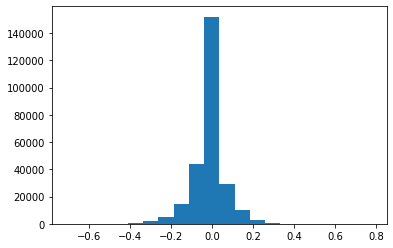

In [168]:
import numpy as np
import matplotlib.pyplot as plt
mean_change = np.mean(tcga_all[[c for c in tcga_all.columns if 'Tumor' in c]].values, axis=1) - np.mean(tcga_all[[c for c in tcga_all.columns if 'Normal' in c]].values, axis=1)
print(len(mean_change[mean_change > 0.1]), len(mean_change[mean_change < -0.1]))
plt.hist(mean_change, bins=20)

6171 1744


(array([3.0000e+00, 5.0000e+00, 1.7000e+01, 5.7000e+01, 1.6800e+02,
        5.6600e+02, 1.9460e+03, 1.5834e+04, 7.3388e+04, 8.1530e+03,
        2.9100e+03, 9.8200e+02, 3.5100e+02, 9.2000e+01, 2.9000e+01,
        6.0000e+00, 5.0000e+00, 4.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([-0.53426145, -0.46871949, -0.40317752, -0.33763556, -0.2720936 ,
        -0.20655163, -0.14100967, -0.07546771, -0.00992574,  0.05561622,
         0.12115818,  0.18670015,  0.25224211,  0.31778407,  0.38332604,
         0.448868  ,  0.51440996,  0.57995193,  0.64549389,  0.71103585,
         0.77657782]),
 <BarContainer object of 20 artists>)

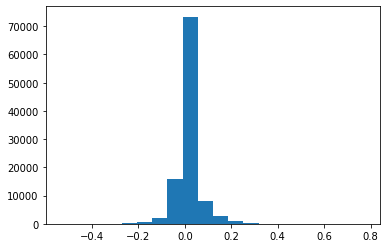

In [169]:
island = tcga_all[tcga_all['Relation_to_Island'] == 'Island']
mean_change = np.mean(island[[c for c in island.columns if 'Tumor' in c]].values, axis=1) - np.mean(island[[c for c in island.columns if 'Normal' in c]].values, axis=1)
print(len(mean_change[mean_change > 0.1]), len(mean_change[mean_change < -0.1]))
plt.hist(mean_change, bins=20)

In [170]:
# We also want all the supplementary TCGA dataset methylation
tcga_all = tcga_all.fillna(0)
tcga_all["Locus"] = tcga_all.index
tcga_all.to_csv(f'{output_dir}meth_df_CPTAC-TCGA.csv', index=True)


In [174]:
tcga_all

,cpg_id,CpG_Normal_db01e359.10a7.48c0.a742.656183e60ba8_1,CpG_Normal_03c62ae5.662b.493b.b7b9.1bdd1cfafb5d_1,CpG_Normal_6942780c.b6c7.4534.b9b7.feda9cd04ecc_1,CpG_Normal_ed7f6372.d820.43b9.bafa.7d83be8f66ec_1,CpG_Normal_c474cee0.1117.4576.9e44.17938be10ca5_1,CpG_Normal_990080e4.9a47.4271.af1e.b34d7a973841_1,CpG_Normal_c0357545.fb85.4d3c.b653.54fe2d1f7d18_1,CpG_Normal_9e662d2e.69ba.47f4.8954.3647ce22dc18_1,CpG_Normal_ce33af25.6279.4e4a.8cfc.61d03c7eaf2f_1,...,CpG_Tumor_C3N.01261_1,CpG_Tumor_C3N.01361_1,CpG_Tumor_C3N.01522_1,CpG_Tumor_C3N.01524_1,CpG_Tumor_C3N.01646_1,CpG_Tumor_C3N.01648_1,CpG_Tumor_C3N.01649_1,CpG_Tumor_C3N.01651_1,CpG_Tumor_C3N.01808_1,Locus
cg00000029,chr16:53434200,0.585096,0.511813,0.489982,0.433942,0.362978,0.216424,0.444647,0.477372,0.456852,...,0.749333,0.419163,0.753077,0.770999,0.721516,0.544133,0.327466,0.503078,0.694581,cg00000029
cg00000236,chr8:42405776,0.890243,0.921860,0.893998,0.892156,0.900247,0.912149,0.914099,0.904354,0.923435,...,0.873052,0.893087,0.861024,0.906754,0.891277,0.847947,0.782197,0.874034,0.875275,cg00000236
cg00000289,chr14:68874422,0.787893,0.764004,0.747008,0.772496,0.819497,0.807987,0.833389,0.750756,0.504889,...,0.545539,0.671885,0.702027,0.689886,0.609681,0.610733,0.632943,0.623050,0.592563,cg00000289
cg00000292,chr16:28878779,0.486220,0.450472,0.550261,0.468594,0.417706,0.534426,0.434728,0.516065,0.500513,...,0.736726,0.403426,0.329949,0.526423,0.680651,0.690699,0.356444,0.678508,0.475394,cg00000292
cg00000321,chr8:41310283,0.383709,0.396987,0.409871,0.514956,0.495738,0.466870,0.470612,0.392804,0.449994,...,0.676859,0.419441,0.521325,0.583523,0.427041,0.294012,0.541033,0.445536,0.552439,cg00000321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ch.X.42405548R,chrX:42661352,0.049304,0.074080,0.054073,0.044249,0.063061,0.028285,0.036191,0.045584,0.104399,...,0.102222,0.095231,0.082132,0.074636,0.069788,0.107173,0.147709,0.103869,0.136737,ch.X.42405548R
ch.X.557489R,chrX:34358320,0.107342,0.137135,0.067283,0.061627,0.102144,0.061248,0.052358,0.081089,0.232619,...,0.156391,0.132571,0.076778,0.111397,0.097706,0.116886,0.171847,0.142111,0.153098,ch.X.557489R
ch.X.665616F,chrX:41219099,0.166893,0.181600,0.081570,0.074302,0.143562,0.060974,0.063811,0.102876,0.246511,...,0.178430,0.176420,0.100230,0.132132,0.195308,0.174261,0.244952,0.219125,0.247429,ch.X.665616F
ch.X.772253F,chrX:47204286,0.165270,0.190517,0.119149,0.110620,0.072773,0.076397,0.113159,0.103859,0.324864,...,0.089806,0.121446,0.090446,0.084857,0.117017,0.095262,0.270480,0.075017,0.289129,ch.X.772253F


In [171]:
[c for c in tcga_all if 'Locus' in c]

['Locus']

In [172]:
len(set(tcga_all['ensembl_gene_id']))

26086

In [173]:
merged_sample_df.to_csv(f'{output_dir}meth_sample_df_CPTAC-TCGA.csv', index=True)

,case,SampleId,CondId,CondName,SafeCases,FullLabel,TumorStage,gender,RaceGrouped,AgeGrouped
0,C3L-00004,C3L-00004_Tumor,1,Tumor,C3L.00004,CpG_Tumor_C3L.00004_1,Stage III,Male,White,old
1,C3L-00010,C3L-00010_Tumor,1,Tumor,C3L.00010,CpG_Tumor_C3L.00010_1,Stage I,Male,White,young
2,C3L-00011,C3L-00011_Tumor,1,Tumor,C3L.00011,CpG_Tumor_C3L.00011_1,Stage IV,Female,White,old
3,C3L-00026,C3L-00026_Tumor,1,Tumor,C3L.00026,CpG_Tumor_C3L.00026_1,Stage I,Female,White,old
4,C3L-00079,C3L-00079_Tumor,1,Tumor,C3L.00079,CpG_Tumor_C3L.00079_1,Stage III,Male,White,middle
...,...,...,...,...,...,...,...,...,...,...
246,f29b6c8c-d713-42ad-9b90-e556df9b05cd,f29b6c8c-d713-42ad-9b90-e556df9b05cd_Normal,0,Normal,f29b6c8c.d713.42ad.9b90.e556df9b05cd,CpG_Normal_f29b6c8c.d713.42ad.9b90.e556df9b05cd_1,Stage III,Male,White,middle
247,cb371398-ee48-4665-8089-26229c5b2cf0,cb371398-ee48-4665-8089-26229c5b2cf0_Normal,0,Normal,cb371398.ee48.4665.8089.26229c5b2cf0,CpG_Normal_cb371398.ee48.4665.8089.26229c5b2cf0_1,Stage IV,Male,White,old
248,ac092a8e-80af-4589-8bb8-d86427b398ca,ac092a8e-80af-4589-8bb8-d86427b398ca_Normal,0,Normal,ac092a8e.80af.4589.8bb8.d86427b398ca,CpG_Normal_ac092a8e.80af.4589.8bb8.d86427b398ca_1,Stage I,Male,Blackorafricanamerican,middle
249,318f6ffb-1fdf-4f74-90db-21e337503aae,318f6ffb-1fdf-4f74-90db-21e337503aae_Normal,0,Normal,318f6ffb.1fdf.4f74.90db.21e337503aae,CpG_Normal_318f6ffb.1fdf.4f74.90db.21e337503aae_1,Stage III,Male,White,middle


## Create a methylation sample data frame for TCGA patients

In [12]:
tcga_normal = pd.read_csv('../data/TCGA/TCGA-KIRC-normal.csv', index_col=0)
tcga_normal

,comp_elem_ref,cpg_id,TCGA-KIRC_SolidTissueNormal_male_white_2_HumanMethylation450_None_58_TCGA-KIRC_TCGA-BP-5199_db01e359-10a7-48c0-a742-656183e60ba8,TCGA-KIRC_SolidTissueNormal_male_blackorafricanamerican_3_HumanMethylation450_None_57_TCGA-KIRC_TCGA-CJ-4882_03c62ae5-662b-493b-b7b9-1bdd1cfafb5d,TCGA-KIRC_SolidTissueNormal_female_white_2_HumanMethylation450_1121_78_TCGA-KIRC_TCGA-B0-4852_6942780c-b6c7-4534-b9b7-feda9cd04ecc,TCGA-KIRC_SolidTissueNormal_female_white_1_HumanMethylation450_None_59_TCGA-KIRC_TCGA-CZ-4859_ed7f6372-d820-43b9-bafa-7d83be8f66ec,TCGA-KIRC_SolidTissueNormal_male_white_1_HumanMethylation450_None_55_TCGA-KIRC_TCGA-BP-5170_c474cee0-1117-4576-9e44-17938be10ca5,TCGA-KIRC_SolidTissueNormal_female_white_1_HumanMethylation450_None_62_TCGA-KIRC_TCGA-CZ-4856_990080e4-9a47-4271-af1e-b34d7a973841,TCGA-KIRC_SolidTissueNormal_female_white_2_HumanMethylation450_510_68_TCGA-KIRC_TCGA-B0-4818_c0357545-fb85-4d3c-b653-54fe2d1f7d18,TCGA-KIRC_SolidTissueNormal_female_white_3_HumanMethylation450_None_69_TCGA-KIRC_TCGA-CJ-4916_9e662d2e-69ba-47f4-8954-3647ce22dc18,...,TCGA-KIRC_SolidTissueNormal_female_white_1_HumanMethylation450_None_50_TCGA-KIRC_TCGA-BP-5186_27b38cec-40fe-4598-959c-f3a1408ba17d,TCGA-KIRC_SolidTissueNormal_male_white_3_HumanMethylation450_None_49_TCGA-KIRC_TCGA-CJ-4869_d781be9c-7b3b-4acf-b202-d4d4b847db05,TCGA-KIRC_SolidTissueNormal_male_white_4_HumanMethylation450_168_58_TCGA-KIRC_TCGA-B0-4814_62bcce15-fdaf-49d4-9bed-24a493f5776b,TCGA-KIRC_SolidTissueNormal_male_white_4_HumanMethylation450_42_75_TCGA-KIRC_TCGA-B0-4698_e3ed1380-d6f1-420e-b6a6-d24a6e81a364,TCGA-KIRC_SolidTissueNormal_male_white_3_HumanMethylation450_106_72_TCGA-KIRC_TCGA-B0-4694_c92995d5-68ce-47d0-8149-0323e624c032,TCGA-KIRC_SolidTissueNormal_male_white_3_HumanMethylation450_None_43_TCGA-KIRC_TCGA-CZ-5458_f29b6c8c-d713-42ad-9b90-e556df9b05cd,TCGA-KIRC_SolidTissueNormal_male_white_4_HumanMethylation450_None_69_TCGA-KIRC_TCGA-CZ-5464_cb371398-ee48-4665-8089-26229c5b2cf0,TCGA-KIRC_SolidTissueNormal_male_blackorafricanamerican_1_HumanMethylation450_1696_51_TCGA-KIRC_TCGA-A3-3376_ac092a8e-80af-4589-8bb8-d86427b398ca,TCGA-KIRC_SolidTissueNormal_male_white_3_HumanMethylation450_478_47_TCGA-KIRC_TCGA-B0-4810_318f6ffb-1fdf-4f74-90db-21e337503aae,TCGA-KIRC_SolidTissueNormal_male_white_4_HumanMethylation450_1337_76_TCGA-KIRC_TCGA-B0-4712_ef9ae1dd-83aa-404d-83ef-ced707ae738b
0,cg00000029,chr16:53434200,0.585096,0.511813,0.489982,0.433942,0.362978,0.216424,0.444647,0.477372,...,0.492131,0.482295,0.331813,0.483519,0.352021,0.407191,0.417096,0.387277,0.479396,0.270373
1,cg00000108,chr3:37417715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,cg00000109,chr3:172198247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,cg00000165,chr1:90729117,0.112046,0.124627,0.125703,0.131980,0.136427,0.121054,0.078726,0.159395,...,0.110112,0.117445,0.165679,0.113446,0.106500,0.128271,0.123130,0.145776,0.127239,0.088902
4,cg00000236,chr8:42405776,0.890243,0.921860,0.893998,0.892156,0.900247,0.912149,0.914099,0.904354,...,0.827524,0.926865,0.907697,0.868838,0.876332,0.908702,0.882604,0.926601,0.903058,0.913879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480432,rs9363764,chr6:67522149,0.958777,0.029669,0.022984,0.969557,0.042266,0.970431,0.025363,0.964112,...,0.957271,0.964707,0.545864,0.524157,0.952614,0.530244,0.021642,0.029753,0.973232,0.549709
480433,rs939290,chr3:14617359,0.499332,0.979551,0.532267,0.022846,0.973063,0.969120,0.021137,0.502045,...,0.017175,0.524521,0.531782,0.979047,0.532914,0.503287,0.979060,0.530323,0.981460,0.525923
480434,rs951295,chr15:45707625,0.979259,0.978631,0.517537,0.035266,0.543317,0.962350,0.527981,0.542110,...,0.534639,0.028460,0.054535,0.519416,0.535817,0.025882,0.508680,0.534920,0.536647,0.023618
480435,rs966367,chr2:12008094,0.032289,0.032615,0.034503,0.031796,0.492723,0.516675,0.518407,0.475700,...,0.956839,0.034964,0.053458,0.026630,0.040

In [18]:
# Want to make the sample df have the case ID so we can get the mutation information 
cases = [c.split('_')[-2] for c in tcga_normal.columns if 'KIRC' in c]
cases

['TCGA-BP-5199',
 'TCGA-CJ-4882',
 'TCGA-B0-4852',
 'TCGA-CZ-4859',
 'TCGA-BP-5170',
 'TCGA-CZ-4856',
 'TCGA-B0-4818',
 'TCGA-CJ-4916',
 'TCGA-B0-4699',
 'TCGA-B0-5119',
 'TCGA-B0-5097',
 'TCGA-CZ-5459',
 'TCGA-B0-4849',
 'TCGA-B0-4713',
 'TCGA-B0-4811',
 'TCGA-CZ-5466',
 'TCGA-BP-4770',
 'TCGA-B0-5109',
 'TCGA-CZ-5451',
 'TCGA-B0-5108',
 'TCGA-B0-5117',
 'TCGA-CZ-5460',
 'TCGA-BP-5200',
 'TCGA-BP-5191',
 'TCGA-B0-5110',
 'TCGA-BP-4801',
 'TCGA-B0-4817',
 'TCGA-BP-5194',
 'TCGA-CJ-4920',
 'TCGA-BP-5183',
 'TCGA-B0-4945',
 'TCGA-BP-5187',
 'TCGA-BP-5190',
 'TCGA-A3-3370',
 'TCGA-CJ-4904',
 'TCGA-BP-5173',
 'TCGA-B0-4688',
 'TCGA-B0-4827',
 'TCGA-BP-5177',
 'TCGA-CZ-5465',
 'TCGA-CJ-4905',
 'TCGA-BP-4993',
 'TCGA-BP-5192',
 'TCGA-B0-4696',
 'TCGA-BP-5168',
 'TCGA-CZ-5468',
 'TCGA-CZ-5461',
 'TCGA-BP-4760',
 'TCGA-BP-5198',
 'TCGA-B0-4843',
 'TCGA-B0-5113',
 'TCGA-B0-5400',
 'TCGA-BP-5182',
 'TCGA-B0-5095',
 'TCGA-BP-5185',
 'TCGA-B0-5402',
 'TCGA-CZ-5470',
 'TCGA-CJ-4912',
 'TCGA-CJ-4907

In [14]:
fileid_to_case = {c.split('_')[-1]:c.split('_')[-2] for c in tcga_normal.columns if 'KIRC' in c}
fileid_to_case

{'db01e359-10a7-48c0-a742-656183e60ba8': 'TCGA-BP-5199',
 '03c62ae5-662b-493b-b7b9-1bdd1cfafb5d': 'TCGA-CJ-4882',
 '6942780c-b6c7-4534-b9b7-feda9cd04ecc': 'TCGA-B0-4852',
 'ed7f6372-d820-43b9-bafa-7d83be8f66ec': 'TCGA-CZ-4859',
 'c474cee0-1117-4576-9e44-17938be10ca5': 'TCGA-BP-5170',
 '990080e4-9a47-4271-af1e-b34d7a973841': 'TCGA-CZ-4856',
 'c0357545-fb85-4d3c-b653-54fe2d1f7d18': 'TCGA-B0-4818',
 '9e662d2e-69ba-47f4-8954-3647ce22dc18': 'TCGA-CJ-4916',
 'ce33af25-6279-4e4a-8cfc-61d03c7eaf2f': 'TCGA-B0-4699',
 'd3177506-025f-4092-be04-63afdf0c1933': 'TCGA-B0-5119',
 'be7956c7-6f9b-4d66-9b7b-1e0d5c5b4782': 'TCGA-B0-5097',
 '7b4da969-95f5-45e0-9344-f2b2e2021a1e': 'TCGA-CZ-5459',
 '21788364-775a-4c5e-b584-ff304aee708d': 'TCGA-B0-4849',
 'c8010f87-98e5-4fb3-8074-70246e94ed9e': 'TCGA-B0-4713',
 'ff31b6e5-a73e-4453-a5ad-c1eb63b39ec7': 'TCGA-B0-4811',
 'fbc15cc8-bc1f-4b98-b952-f446ddca7d30': 'TCGA-CZ-5466',
 '92b181a2-a973-4d49-b402-58ab9ee793bd': 'TCGA-BP-4770',
 '4a47d670-4aaf-4e90-8ea0-bbf91

## Make a TCGA only sample frame

In [70]:
merged_sample_df = pd.read_csv(f'{output_dir}meth_sample_df_CPTAC-TCGA.csv')
merged_sample_df['tcga_case_id'] = [fileid_to_case.get(c) for c in merged_sample_df['case'].values]
tcga_sample_df = merged_sample_df[merged_sample_df['CondId'] == 0]

In [8]:
"""
We only want to do this once I keep it off by default :) 
"""
# Download mutation data
# Here we want to download the mutation files
from scidat.download import Download
from sciutil import SciUtil

supp_dir = f'{base_dir}supps/' # Where you need to put the GDC client
u = SciUtil()
download_mutation = False
if download_mutation:

    download = Download(f'../data/TCGA/kidney_clinical.tsv', 
                        f'../data/TCGA/mutation/', 
                        f'../data/TCGA/mutation/', 
                        f'{supp_dir}gdc-client', 
                        max_cnt=1)
    download.download_data_using_api(cases, 'mutation')
else:
    u.dp(["You said you already have your mutations downloaded, if this isn't the case you'll need to do this!"])


  % Total      % % Tota l Rece%i vTeodt a%l  X f erd      % ReA ceiv% Receeveragivede  Sd % % XferXdf e peed rd A Avveerraaggee Spee dSpeed     T i  TTmieme    Timei     me       Ti meT  Curime    Ti mre T i m e  T iCmuer r eCnutr
r e n t 
   ent
                                                                 D l   o a  d          UpDllooaad  Updl o a dT o t  To tal   S a ple n t  S     p ent     Lef t   DSlpoeaedd 
    Lloaedf t 0 T ota l      0S p e    0Snpte    eLde
      0 d
       0    0 0      0        0      0   0  -- : - -0    00  :  - -  - -: - 00           00      -   :0   0- -  - - : - -0: ---- : - - : -0- --:--:-- --:--:--     0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
  

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- -

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- -

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- -

100     2  100     2    0     0      1      0  0:00:02  0:00:01  0:00:01     1 0  --0 :----::----: -- ----::----::----  ---:--:--:--:-- -        0 0   0  0
100     2  100     2    0     0      1      0  0:00:02  0:00:01  0:00:01     1
100     2  100     2    0     0      1      0  0:00:02  0:00:01  0:00:01     1
100     2  100     2    0     0      1      0  0:00:02  0:00:01  0:00:01     1
100     2  100     2    0     0      1      0  0:00:02  0:00:01  0:00:01     1
100     2  100     2    0     0      1      0  0:00:02  0:00:01  0:00:01     1
100 10707  100 10707    0     0   5615      0  0:00:01  0:00:01 --:--:--  5647
100 15614  100 15614    0     0   9229      0  0:00:01  0:00:01 --:--:--  9282
100     2  100     2    0     0      1      0  0:00:02  0:00:01  0:00:01     1
100     2    0     2    0     0      0      0 --:--:--  0:00:02 --:--:--     0
100     2  100     2    0     0      1      0  0:00:02  0:00:01  0:00:01     1
100     2  100     2    0     0      1      0  0:00:02

100 79665  100 79665    0     0  29629      0  0:00:02  0:00:02 --:--:-- 29725
100 62939  100 62939    0     0  24813      0  0:00:02  0:00:02 --:--:-- 24916
100 88975  100 88975    0     0  31774      0  0:00:02  0:00:02 --:--:-- 31902
100 64009  100 64009    0     0  21036      0  0:00:03  0:00:03 --:--:-- 21160
100 74738  100 74738    0     0  27209      0  0:00:02  0:00:02 --:--:-- 27296
100 81346  100 81346    0     0  29712      0  0:00:02  0:00:02 --:--:-- 29818
100 77866  100 77866    0     0  30110      0  0:00:02  0:00:02 --:--:-- 30215
100 61315  100 61315    0     0  27182      0  0:00:02  0:00:02 --:--:-- 27360
100 60917  100 60917    0     0  29536      0  0:00:02  0:00:02 --:--:-- 29672
100 77338  100 77338    0     0  37580      0  0:00:02  0:00:02 --:--:-- 37725
100 29852  100 29852    0     0   9481      0  0:00:03  0:00:03 --:--:--  9513   0           0  00     2 3 6 90            00  --:--:--  0:   0  0:0  0 0:0:1072 --:--:- -   00::00:03 - 0:00:-14: - -2:--00:3027 

--------------------------------------------------------------------------------
Num cases with mutations: 	114	
Num cases without mutations: 	37	

Cases: 
	TCGA-B0-4852
TCGA-B0-4818
TCGA-B0-4699
TCGA-B0-4849
TCGA-B0-4713
TCGA-B0-4811
TCGA-B0-4817
TCGA-B0-4688
TCGA-B0-4696
TCGA-B0-4843
TCGA-B0-4848
TCGA-B0-4828
TCGA-B0-5102
TCGA-B0-4819
TCGA-CJ-4897
TCGA-B0-4821
TCGA-B0-4816
TCGA-B0-4706
TCGA-B0-4841
TCGA-CZ-4866
TCGA-B0-4690
TCGA-B0-4691
TCGA-B0-4815
TCGA-B0-4703
TCGA-B0-4701
TCGA-B0-4718
TCGA-B0-4813
TCGA-B0-4714
TCGA-CZ-5467
TCGA-B0-4710
TCGA-B0-4844
TCGA-B0-4814
TCGA-B0-4698
TCGA-B0-4694
TCGA-CZ-5464
TCGA-B0-4810
TCGA-B0-4712	
--------------------------------------------------------------------------------


In [2]:
mutation_dir = '../data/TCGA/mutation/'
mutation_files = os.listdir(mutation_dir)
gene_id = 'ssm.consequence.0.transcript.gene.symbol'

genes = ['MTOR', 'PTEN', 'VHL', 'PBRM1', 'KDM5C', 'CUBN', 'USH2A', 'SETD2', 'BAP1', 'MUC16', 'TTN']
for gene in genes:
    mutations = []
    change = 'ssm.genomic_dna_change'
    for f in mutation_files:
        df = pd.read_csv(f'{mutation_dir}{f}', sep='\t')
        df = df[df[gene_id] == gene]
        if len(df) > 0:
            mutations.append(df['ssm.genomic_dna_change'].values[0])
    print(gene, len(mutations), len(set(mutations)))

MTOR 8 8
PTEN 3 3
VHL 57 53
PBRM1 57 57
KDM5C 8 8
CUBN 5 5
USH2A 4 4
SETD2 15 15
BAP1 15 15
MUC16 12 12
TTN 28 28


VHL 57
PBRM1 57
TTN 28
SETD2 15
BAP1 15
DST 12
MUC16 12
KMT2C 9
MTOR 8
KDM5C 8
SPEN 7
KIAA1549L 7
CSMD3 7
ANK3 7
KMT2A 7
TP53 6
STAG2 6
ZFPM2 6
PDZD2 6
DNAH9 6
LRP2 6
KAT6A 6
HMCN1 6
NEB 6
PEG3 6
BIRC6 6
UNC79 5
RANBP2 5
HSPA8 5
LYST 5
THBS1 5
AHNAK2 5
ATM 5
SYNE1 5
TNR 5
CACNA1S 5
LRP1 5
NRXN1 5
APOB 5
COL6A3 5
AKAP9 5
PKHD1L1 5
ZFHX4 5
FBN2 5
SCAF4 5
LRP1B 5
CUBN 5
COL6A6 5
VWF 5
LAMA1 5
CNOT1 5
AP000769.3 5
RALGAPA1 5
FCGBP 5
SYNE2 5
MTUS2 5
NF1 5
ABCA13 5
TRIOBP 5
RPAP1 5
FAT4 5
HIVEP1 4
MACF1 4
FAT1 4
DENND4A 4
UBN1 4
HERC1 4
ADAMTS14 4
ABCC4 4
MARCHF10 4
PTPRT 4
ANKHD1-EIF4EBP3 4
RYR3 4
XIRP2 4
USH2A 4
AKAP6 4
DNAH10 4
FZD10 4
GCC2 4
GIGYF2 4
ATP1B4 4
UTRN 4
ARID1A 4
RGS3 4
ERBB2 4
G3BP1 4
ZNF609 4
PXDN 4
LAMA2 4
FBN1 4
DNAH2 4
NPNT 4
PCNX1 4
ALPK2 4
ALMS1 4
ARMC4 4
CCAR1 4
ROCK1 4
SULF1 4
TARBP1 4
GON4L 4
ZMYM2 4
NOTCH2 4
MYH7 4
DSCAM 4
KIF14 4
TENM1 4
RFC1 4
KCNH7 4
SAMD9 4
TEX13A 4
MAGEC1 4
CSMD1 4
TPR 4
N4BP2L2 4
SEPTIN4 4
IGSF10 4
DOCK2 4
SPHKAP 4
CENPF 4
SIPA1L2 4
ZEB2 4
SD

STEAP1 1
FUBP3 1
COL11A1 1
OPRD1 1
MIDN 1
ETFDH 1
CYBRD1 1
ORC3 1
CDKN2AIPNL 1
SDSL 1
UNC5C 1
KIAA0513 1
MAP1A 1
MARCHF5 1
P4HA1 1
PGAM5 1
PCP4L1 1
RASGRF1 1
NXF5 1
EPAS1 1
TPCN1 1
MTTP 1
SAMHD1 1
SLC17A1 1
AGAP6 1
REXO5 1
ANKRD39 1
SPTBN5 1
TMEM107 1
LCP2 1
PCDHB1 1
IKZF4 1
ADNP2 1
RALGAPB 1
GGN 1
ZNF638 1
IDO2 1
SIK2 1
NXPH4 1
CYC1 1
STAR 1
KIF17 1
AMMECR1 1
TNFRSF9 1
LIMD1 1
AGXT 1
EXOC6 1
TIMM17A 1
PPFIBP2 1
LCAT 1
OGA 1
MYEOV 1
NBEAP2 1
TRIM50 1
CACNG6 1
TECRL 1
MAN2C1 1
PARP14 1
CHSY3 1
ECM2 1
TRMT2B 1
NYNRIN 1
GRN 1
SLC27A1 1
ALG10 1
SEPHS2 1
PRICKLE2 1
TIMM50 1
STON1-GTF2A1L 1
MCF2 1
MRTFB 1
TAS1R3 1
ABCG2 1
GPRC5A 1
TTC30B 1
LINC02870 1
PACSIN3 1
SUN1 1
ACKR3 1
SLC52A1 1
ANKRD12 1
PACS2 1
APOBEC3B 1
FRMPD1 1
FOXM1 1
RND1 1
AL035460.1 1
PTGER4 1
CLCN1 1
PPP1R13L 1
L3MBTL4 1
BMP1 1
CYLD 1
MYL9 1
LTBP3 1
GTF3C5 1
H2AC6 1
GOLGA1 1
LMLN 1
EIF2B3 1
EIF3M 1
SLC26A11 1
TRAPPC10 1
SLC17A5 1
STX11 1
GCKR 1
KCTD14 1
ADAMTS16 1
DRD1 1
PCDHA13 1
DDX24 1
OR51B4 1
SSBP4 1
NUDT21 1
CNOT8 1
CO

DMRTC1 1
LINC02843 1
VSIG1 1
SAG 1
P2RX1 1
SLC2A1 1
ATP13A5 1
THEG 1
SLC12A7 1
ARHGAP11A 1
H3C12 1
RNF40 1
PXDNL 1
SP1 1
ETV3 1
NAV3 1
RBM23 1
AL121899.2 1
DPY19L3 1
ANKRD1 1
OR5B12 1
MYBPC1 1
FOXP4 1
VWA2 1
MFN1 1
MYT1 1
RECK 1
PHLPP2 1
CUL1 1
SERPINA9 1
KRTAP10-11 1
EXT1 1
ITGAX 1
VAV2 1
EFCAB5 1
B4GALNT1 1
VAC14 1
BLMH 1
GPRASP1 1
TMEM97 1
NLRP8 1
PLA2R1 1
TRDN 1
LRBA 1
TLN2 1
PLD3 1
OR13C2 1
TUFT1 1
ARHGEF3 1
TUFM 1
FHOD1 1
LPCAT2 1
EGR2 1
SERINC1 1
KLC1 1
CNOT2 1
PEBP4 1
SAR1B 1
GALK2 1
GCLM 1
LRRC66 1
SMC2 1
RB1CC1 1
PKP2 1
DENND2D 1
DSC1 1
COL22A1 1
CSAG1 1
CHCHD3 1
GCC1 1
MTBP 1
DUSP19 1
FKTN 1
ANGPTL7 1
ZNF185 1
SLC41A1 1
CTDNEP1 1
RIN2 1
PLOD3 1
SERPINB13 1
SLC9C2 1
AP5M1 1
TRAF3IP1 1
CXCL10 1
PON3 1
OR10H2 1
LUC7L2 1
SRP72 1
HSD17B1 1
SPESP1 1
CES1 1
ITM2B 1
STMN2 1
ZNF266 1
SERPINA10 1
ABCC3 1
MGAT5 1
CCDC148 1
OLFM1 1
AP001781.2 1
ATP6V0A2 1
KIF21A 1
DCAF7 1
PRR16 1
XPO6 1
KIF5C 1
USHBP1 1
PCIF1 1
CDKL4 1
NDUFAF6 1
ANKIB1 1
MGAT4A 1
IFNAR1 1
SCRN2 1
TMCC1 1
MRO 1
NDUFS2 1


UFL1 1
CD163L1 1
ASIC5 1
TNFSF13 1
SPAG9 1
TBL3 1
GPR183 1
PSENEN 1
MIOX 1
MYH8 1
SLC11A2 1
CTSH 1
PAK4 1
LY75 1
SRSF11 1
TH 1
MYO19 1
SLC35B3 1
C2orf78 1
C20orf204 1
PAX3 1
EBNA1BP2 1
KIF5A 1
SV2C 1
ZNF532 1
TLR2 1
COQ10A 1
GSE1 1
RBM8A 1
BMP5 1
GPATCH2 1
ADCY10 1
DDTL 1
DDX39B 1
ST6GALNAC2 1
CHMP2A 1
SLC15A2 1
HAS3 1
RFXAP 1
GAA 1
VSIR 1
ANPEP 1
HMGCS1 1
DHRS13 1
SECISBP2L 1
TCHH 1
UROD 1
TM2D2 1
ZNF319 1
AKAP7 1
AL645922.1 1
TOE1 1
ILVBL 1
ZFHX3 1
ANKH 1
ZCCHC9 1
TXNDC11 1
UBC 1
MARCKS 1
ISY1-RAB43 1
RDM1 1
MYO3B 1
SYCP2L 1
GPRC5B 1
STON1 1
KTN1 1
PHF23 1
MACROH2A2 1
SEMA6D 1
FAM120A 1
SGIP1 1
PSMD3 1
TPM2 1
SPEM1 1
ARID1B 1
SYNRG 1
SPRED1 1
LCOR 1
POM121 1
ZC3H3 1
ARHGAP32 1
SDHAF3 1
TECTA 1
PRLHR 1
ABCB4 1
COL4A1 1
RGL2 1
CDCP1 1
ZGPAT 1
OSBPL8 1
NDUFAF2 1
C21orf58 1
LRRTM1 1
COL4A4 1
KRTAP19-2 1
RBBP6 1
COIL 1
SLC4A4 1
DPYD 1
OR6N1 1
KLF10 1
KCNV2 1
MICU2 1
POR 1
FXR2 1
PCNX3 1
TUB 1
TLCD2 1
CBR4 1
EOGT 1
ARHGAP10 1
IQCE 1
BORA 1
PIK3CD 1
ZNF703 1
OCIAD2 1
FERMT1 1
KCNH2 1
ZNF165

Text(0.5, 1.0, 'Number of mutations per case (if gene has 5 or more cases)')

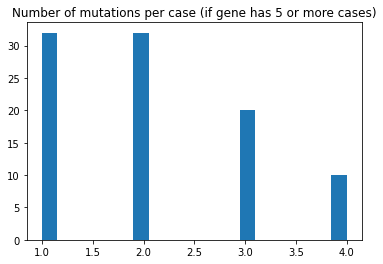

In [3]:
from scidat.api import API, APIException
import matplotlib.pyplot as plt

tcga_data_dir = f'../data/S050_CCRCC_Clark_Cell2019/downloaded_data/TCGA/'
gdc_client = f'{tcga_data_dir}./gdc-client'
sample_file = f'{tcga_data_dir}gdc_sample_sheet.2021-05-03.tsv'
manifest_file = f'{tcga_data_dir}gdc_manifest_20210503_065756.txt'
annotation_file = f'{tcga_data_dir}tcga_hsapiens_gene_ensembl-GRCh38.p13.csv'
clinical_file = f'{tcga_data_dir}clinical.cart.2021-05-03/clinical.tsv'

api = API(manifest_file, gdc_client, clinical_file, sample_file, data_dir, data_dir, annotation_file,
                            max_cnt=10, requires_lst=['counts'])

mutation_dir = '../data/TCGA/mutation/'

api.build_mutation_df(mutation_dir)

# Now we want to build a dictionary with mutations and cases.
filter_col = 'ssm.consequence.0.transcript.gene.symbol'
genes_with_mutations = api.get_mutation_values_on_filter('ssm.consequence.0.transcript.gene.symbol', [''], 'ssm.consequence.0.transcript.gene.symbol')

# Now for each gene we want to count the patients with mutations
cases_w_mutations = {}
for g in genes_with_mutations:
    cases = api.get_mutation_values_on_filter('case_id', [g], filter_col, exact=True)
    cases_w_mutations[g] = cases


# Sort keys by the genes with most mutations
sorted_genes_w_mutations = sorted(cases_w_mutations, key=lambda k: len(cases_w_mutations[k]), reverse=True)

# Print these out!
for g in sorted_genes_w_mutations:
    print(g, len(cases_w_mutations[g]))
    
case_to_mutation = {}
for gene in cases_w_mutations:
    if len(cases_w_mutations[gene]) > 10:
        for c in cases_w_mutations[gene]:
            if case_to_mutation.get(c):
                case_to_mutation[c].append(gene)
            else:
                case_to_mutation[c] = [gene]
                
# Check how many patients only have one mutation
number_mutations = []
for c in case_to_mutation:
    number_mutations.append(len(case_to_mutation[c]))
    
plt.hist(number_mutations, bins=20)
plt.title("Number of mutations per case (if gene has 5 or more cases)")

In [4]:
vhl_and_ttn = [c for c, v in case_to_mutation.items() if 'VHL' in v and 'TTN' in v]
vhl_no_ttn = [c for c, v in case_to_mutation.items() if 'VHL' in v and 'TTN' not in v]
vhl_and_pbrm1 = [c for c, v in case_to_mutation.items() if 'VHL' in v and 'PBRM1' in v]
vhl_no_pbrm1 = [c for c, v in case_to_mutation.items() if 'VHL' in v and 'PBRM1' not in v]
pbrm1_no_vhl = [c for c, v in case_to_mutation.items() if 'VHL' not in v and 'PBRM1' in v]
vhl = [c for c, v in case_to_mutation.items() if 'VHL' in v and 'PBRM1' not in v and 'TTN' not in v]
ttn_no_vhl = [c for c, v in case_to_mutation.items() if 'VHL' not in v and 'TTN' in v]
vhl_ttn_pbrm1 = [c for c, v in case_to_mutation.items() if 'VHL' not in v and 'TTN' in v and 'PBRM1' in v]

In [33]:
pbrm1 = [c for c, v in case_to_mutation.items() if 'PBRM1' in v]
bap1 = [c for c, v in case_to_mutation.items() if 'BAP1' in v]
overlap = list(set(bap1) & set(pbrm1)) # Interesting! 
print(overlap)

['TCGA-B0-5107', 'TCGA-CJ-4923', 'TCGA-CZ-5470', 'TCGA-B0-5096', 'TCGA-B0-4842', 'TCGA-B0-5097']


In [71]:
## Finally let's add a column to our clinical DF for each of the mutations
genes_of_interest = ['MTOR', 'VHL', 'SETD2', 'PBRM1', 'KDM5C', 'TTN', 'BAP1']
mutations_to_cases = {}
all_cases_w_muts = []
for g in genes_of_interest:
    mutations_to_cases[g] = api.get_mutation_values_on_filter('case_id', [g], filter_col, exact=True)
    all_cases_w_muts += mutations_to_cases[g]

for g in genes_of_interest:
    mutation_col = []
    for case in tcga_sample_df['tcga_case_id'].values:
        if case in mutations_to_cases[g]:
            mutation_col.append(1) # has mutation
        else:
            mutation_col.append(0)
    tcga_sample_df[f'{g}_mutation'] = mutation_col

/Users/ariane/opt/miniconda3/envs/clean_ml/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [72]:
tcga_sample_df

,case,SampleId,CondId,CondName,SafeCases,FullLabel,TumorStage,gender,RaceGrouped,AgeGrouped,tcga_case_id,MTOR_mutation,VHL_mutation,SETD2_mutation,PBRM1_mutation,KDM5C_mutation,TTN_mutation,BAP1_mutation
100,db01e359-10a7-48c0-a742-656183e60ba8,db01e359-10a7-48c0-a742-656183e60ba8_Normal,0,Normal,db01e359.10a7.48c0.a742.656183e60ba8,CpG_Normal_db01e359.10a7.48c0.a742.656183e60ba8_1,Stage II,Male,White,old,TCGA-BP-5199,0,0,0,0,0,0,0
101,03c62ae5-662b-493b-b7b9-1bdd1cfafb5d,03c62ae5-662b-493b-b7b9-1bdd1cfafb5d_Normal,0,Normal,03c62ae5.662b.493b.b7b9.1bdd1cfafb5d,CpG_Normal_03c62ae5.662b.493b.b7b9.1bdd1cfafb5d_1,Stage III,Male,Blackorafricanamerican,middle,TCGA-CJ-4882,0,0,1,0,0,1,1
102,6942780c-b6c7-4534-b9b7-feda9cd04ecc,6942780c-b6c7-4534-b9b7-feda9cd04ecc_Normal,0,Normal,6942780c.b6c7.4534.b9b7.feda9cd04ecc,CpG_Normal_6942780c.b6c7.4534.b9b7.feda9cd04ecc_1,Stage II,Female,White,old,TCGA-B0-4852,0,0,0,0,0,0,0
103,ed7f6372-d820-43b9-bafa-7d83be8f66ec,ed7f6372-d820-43b9-bafa-7d83be8f66ec_Normal,0,Normal,ed7f6372.d820.43b9.bafa.7d83be8f66ec,CpG_Normal_ed7f6372.d820.43b9.bafa.7d83be8f66ec_1,Stage I,Female,White,old,TCGA-CZ-4859,0,1,0,0,0,1,0
104,c474cee0-1117-4576-9e44-17938be10ca5,c474cee0-1117-4576-9e44-17938be10ca5_Normal,0,Normal,c474cee0.1117.4576.9e44.17938be10ca5,CpG_Normal_c474cee0.1117.4576.9e44.17938be10ca5_1,Stage I,Male,White,middle,TCGA-BP-5170,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,f29b6c8c-d713-42ad-9b90-e556df9b05cd,f29b6c8c-d713-42ad-9b90-e556df9b05cd_Normal,0,Normal,f29b6c8c.d713.42ad.9b90.e556df9b05cd,CpG_Normal_f29b6c8c.d713.42ad.9b90.e556df9b05cd_1,Stage III,Male,White,middle,TCGA-CZ-5458,0,1,0,0,0,0,0
247,cb371398-ee48-4665-8089-26229c5b2cf0,cb371398-ee48-4665-8089-26229c5b2cf0_Normal,0,Normal,cb371398.ee48.4665.8089.26229c5b2cf0,CpG_Normal_cb371398.ee48.4665.8089.26229c5b2cf0_1,Stage IV,Male,White,old,TCGA-CZ-5464,0,0,0,0,0,0,0
248,ac092a8e-80af-4589-8bb8-d86427b398ca,ac092a8e-80af-4589-8bb8-d86427b398ca_Normal,0,Normal,ac092a8e.80af.4589.8bb8.d86427b398ca,CpG_Normal_ac092a8e.80af.4589.8bb8.d86427b398ca_1,Stage I,Male,Blackorafricanamerican,middle,TCGA-A3-3376,0,0,0,0,0,0,0
249,318f6ffb-1fdf-4f74-90db-21e337503aae,318f6ffb-1fdf-4f74-90db-21e337503aae_Normal,0,Normal,318f6ffb.1fdf.4f74.90db.21e337503aae,CpG_Normal_318f6ffb.1fdf.4f74.90db.21e337503aae_1,Stage III,Male,White,middle,TCGA-B0-4810,0,0,0,0,0,0,0


In [73]:
tcga_sample_df.to_csv('../data/S050_CCRCC_Clark_Cell2019/sircle/clinical_TCGA_13052022.csv', index=False)